In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import json
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':'Arial'})
rc('text',usetex=True)

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.rm'] = 'Arial'

### Parse files to collect needed information

In [121]:
#Nucleotide sequences
seq = {}
seq_file = './FinalSeqs/NEAT1_gene_all.fasta'
with open(seq_file) as file1:
    fl = 0
    for line in file1:
        if line.startswith('>') and fl == 0:
            l = []
            name = line.rstrip().lstrip('>')
            fl = 1
        elif line.startswith('>') and fl == 1:
            seq[name] = ''.join(l)
            l = []
            name = line.rstrip().lstrip('>')
        elif not line.startswith('>'):
            l.append(line.strip())
    seq[name] = ''.join(l)

In [1]:
#Metadata
tax_species = {}
tax_order = {}
poly = {}
latin = {}
neat1 = {}
length = {}
gaps = {}
with open('Metadata') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if not line.startswith('#') and dat[3] == '1':
            dat = line.strip().split('\t')
            latin[dat[0]] = dat[1]
            tax_species[dat[0]] = dat[20].upper()
            tax_order[dat[0]] = dat[17]
            neat1[dat[0]] = {}
            length[dat[0]] = int(dat[5])
            if dat[7]:
                poly[dat[0]] = [int(dat[7])]
            else:
                poly[dat[0]] = []
            if dat[9] not in ['0','Nan']:
                gaps[dat[0]] = [int(i) for i in dat[10].split(';')]


In [123]:
#Transposable elements
TE = json.load(open("./TE/NEAT1_non_overlapping_TE_nodust.json","r"))

In [124]:
colors = {}
for i in range(50,101):
    if i < 60:
        colors[i] = '#C2C2C2'
    elif i >= 60 and i < 70:
        colors[i] = '#EED1A8'
    elif i >= 70 and i < 80:
        colors[i] = '#D8D3E5'
    elif i >= 80 and i < 90:
        colors[i] = '#CBE0BA'
    else:
        colors[i] = '#FAD7D5'

In [125]:
#G-quadruplexes
GQ = {}
with open('./Archetypes/GQuadPredicted') as file1:
    for line in file1:
        if not line.startswith('sequenceName') and not line.startswith('#'):
            dat = line.strip().split(',')
            name = dat[0].replace('"','')
            if name not in GQ:
                GQ[name] = []
            for i in range(int(dat[1]),int(dat[2])):
                GQ[name].append(i)

In [126]:
#Short Sequence Repeats
ssr = {}
with open('./SSR_search/NEAT1_SSR.misa') as file1:
    for line in file1:
        if not line.startswith('ID'):
            dat = line.strip().split('\t')
            if dat[0] in neat1:
                if dat[0] not in ssr:
                    ssr[dat[0]] = [0 for i in range(length[dat[0]])]
                for i in range(int(dat[-2]),int(dat[-1])):
                    ssr[dat[0]][i] = -1

In [127]:
#BLAST results
blast = {}
c = 1
with open('./BLAST_all_vs_all/NEAT1_all_vs_all.txt') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if int(dat[2]) > 500:
            if dat[0] not in blast:
                blast[dat[0]] = {}
            if dat[1] not in blast[dat[0]]:
                blast[dat[0]][dat[1]] = {}
            a = [int(dat[4]),int(dat[6])]
            b = [int(dat[5]),int(dat[7])]
            blast[dat[0]][dat[1]][c] = [a,b,int(round(float(dat[3]),0))]
            c += 1

In [128]:
#ANI
d = json.load(open("./BLAST_all_vs_all/NEAT1_ANI.json","r"))

In [129]:
libtree_order = []
with open('./PhyloTree/leaves_order_all_tree_libnames') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        libtree_order.append(dat[1])

In [130]:
Rodents = ['GCA_020740815.1_VCOM_Snig_1.0', 'GCA_902686445.2_mSciCar1.2', 'GCA_902686455.2_mSciVul1.2', 'GCF_021218885.1_Marmota_monax_Labrador192_V1.0', 'GCF_003676075.2_GSC_YBM_2.0', 'GCF_001458135.1_marMar2.1','GCF_000151885.1_Dord_2.0', 'GCA_004024685.1_DipSte_v1_BIUU', 'GCA_024711535.1_mDipMer1.0.p', 'GCF_019054845.1_ASM1905484v1', 'GCA_903995435.1_mAcoRus1.1', 'GCA_907169655.1_mAcoPer2_REL_1905', 'GCA_907164435.1_mAcoDim1_REL_1905', 'GCA_029890205.1_ASM2989020v1', 'GCF_900094665.1_CAROLI_EIJ_v1.1', 'GCA_921997135.2_SPRET_EiJ_v3', 'GCA_026508895.1_MPIMG_PWD_2b', 'GCA_003336285.2_MUSP714_v2', 'GCA_902729485.2_Mus_minutoides_I2396_v1', 'GCF_900095145.1_PAHARI_EIJ_v1.1', 'GCA_902806775.1_Field_vole_promethion_pilon', 'GCA_020392405.1_ASM2039240v1', 'GCF_018167655.1_Mior012', 'GCF_000317375.1_MicOch1.0', 'GCA_028537955.1_mMicCal1.0.hap1', 'GCA_019206885.2_ASM1920688v2']


In [131]:
Archetypes = ['GCF_015852505.1_mTacAcu1.pri', 'GCF_016433145.1_AgileGrace', 'GCA_016432865.2_AdamAnt_v2',
         'GCF_000313985.2_ASM31398v2', 'GCA_000152225.2_Pcap_2.0', 'GCF_014898055.1_MPIMG_talOcc4',
         'GCF_000296755.1_EriEur2.0', 'GCA_029834395.2_SorCin_2.1', 'Human_NEAT1', 'GCA_013371645.1_OryCun3.0',
         'GCF_014633375.1_OchPri4.0', 'GCF_020740685.1_mJacJac1.mat.Y.cur', 'GCA_023101885.1_KIZ_TCIN_v1.0',
         'Mouse_NEAT1','GCF_019054845.1_ASM1905484v1', 'GCA_004027875.1_AplRuf_v1_BIUU']

In [132]:
colormap = {'DNA':'#efba36','SINE':'#f96861','LINE':'#80b364','Other':'#cfc5ea',
           '70':'#EED1A8','80':'#D8D3E5','90':'#CBE0BA','100':'#FAD7D5',
           'g4':'#d470a0','polya':'#686868','ssr':'royalblue','kmer':'#d470a0','Other2':'#8c5792'}

In [142]:
def print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg,fontsize,namelength,GQflag,ANI):
    global blast
    global GQ, TE
    global poly
    global ssr
    global length
    global colormap
    
    xstart = 0
    plt.figure(figsize=figsize)
    fig,ax = plt.subplots()
    for idx in range(1,len(genomes)):
        #Plot similarity between 2 orthologs
        genome1 = genomes[idx - 1 ]
        genome2 = genomes[idx]
        if genome1 in blast and genome2 in blast[genome1]:
            for item in blast[genome1][genome2]:
                start = blast[genome1][genome2][item][0]
                end = blast[genome1][genome2][item][1]
                polygon = mpatches.Polygon([(start[1],idx+1), (end[1],idx+1),(end[0],idx),(start[0],idx)],
                                         facecolor=colors[blast[genome1][genome2][item][2]],
                                          edgecolor='black',linewidth=0.2)
                ax.add_patch(polygon)

        plt.plot([idx for i in range(length[genome1])],'s',color='dimgray',markersize=0.2)
        ## PLOT ELEMENTS FOR GENOME 1
        #Plot G-quadruplexes locations
        if GQflag:
            g = [idx if i in GQ[genome1] else 0 for i in range(length[genome1])]
            plt.plot(g, '|',markersize=3,color=colormap['g4'])

        #Plot locations of SSR
        if genome1 in ssr:
            sp = [idx if ssr[genome1][i] == -1 else 0 for i in range(length[genome1])]
            plt.plot(sp, '|',markersize=4,color=colormap['ssr'])
        
        #Plot location of PAS
        pa = [idx if i in poly[genome1] else 0 for i in range(length[genome1])]
        plt.plot(pa, 'D',markersize=1,color=colormap['polya'])
        
        #Plot locations of sequence gaps
        if genome1 in gaps:
            g = [idx if i in gaps[genome1] else 0 for i in range(length[genome1])]
            plt.plot(g, '|',markersize=2,color='black')
        #Plot TEs in colours in accordance to their classification
        if genome1 in TE:
            for element in TE[genome1]:
                if 'DNA' in element:
                    color=colormap['DNA']
                elif 'SINE' in element:
                    color=colormap['SINE']
                elif 'LINE' in element:
                    color = colormap['LINE']
                else:
                    color=colormap['Other']
                a = [idx if i in range(TE[genome1][element][1],TE[genome1][element][2]) else 0 for i in range(length[genome1])]
                plt.plot(a, 's',markersize=3,color=color)
        # Add species names
        if namelength == 'short':
            genname1 = latin[genome1].split('\ ')[0][0] + '. ' + latin[genome1].split(' ')[1]
            genname2 = latin[genome2].split('\ ')[0][0] + '. ' + latin[genome2].split(' ')[1]
        elif namelength == 'long':
            genname1 = '\ '.join(latin[genome1].split(' ')[:2])
            genname2 = '\ '.join(latin[genome2].split(' ')[:2])

        if ANI:
            plt.text(-3000, idx+0.4, str(round(d[genome1][genome2],2)) + " \%",fontsize=fontsize)
        else:
            plt.text(text_start, idx, r"$\mathit{" + genname1 + "}$",fontsize=fontsize, fontstyle='italic')
            plt.text(text_start, idx+1, r"$\mathit{" + genname2 + "}$",fontsize=fontsize, fontstyle='italic')
        idx += 1
        
    ## PLOT ELEMENTS FOR GENOME 2
    
    plt.plot([idx for i in range(length[genome2])],'s',color='dimgray',markersize=0.2)
    
    #Plot location of PAS
    pa = [idx if i in poly[genome2] else 0 for i in range(length[genome2])]
    plt.plot(pa, 'D',markersize=1,color=colormap['polya'])
    
    #Plot location of SSR
    sp = [idx if ssr[genome2][i] == -1 else 0 for i in range(length[genome2])]
    plt.plot(sp, '|',markersize=4,color=colormap['ssr'])
    
    #Plot locations of assembly gaps
    if genome2 in gaps:
        g = [idx if i in gaps[genome2] else 0 for i in range(length[genome2])]
        plt.plot(g, '|',markersize=2,color='black')
        
    #Plot locations of G-quadruplexes
    if GQflag:
        g = [idx if i in GQ[genome2] else 0 for i in range(length[genome2])]
        plt.plot(g, '|',markersize=3,color=colormap['g4'])
    #Plot TEs in colours in accordance to their classification
    if genome2 in TE:
        for element in TE[genome2]:
            if 'DNA' in element:
                color=colormap['DNA']
            elif 'SINE' in element:
                color=colormap['SINE']
            elif 'LINE' in element:
                color = colormap['LINE']
            else:
                color=colormap['Other']
            a = [idx if i in range(TE[genome2][element][1],TE[genome2][element][2]) else 0 for i in range(length[genome2])]
            plt.plot(a, 's',markersize=3,color=color)
    #Set general figure parameters
    plt.xlim([0,xlim])
    plt.ylim([0.7,len(genomes) + 1])
    plt.yticks([])
    plt.xticks(fontsize=fsizeticks)

    #Legend
    patch_70 = mpatches.Patch(color=colormap['70'], label='60-70')
    patch_80 = mpatches.Patch(color=colormap['80'], label='70-80')
    patch_90 = mpatches.Patch(color=colormap['90'], label='80-90')
    patch_100 = mpatches.Patch(color=colormap['100'], label='$>$ 90')
    patch_LINE = mpatches.Patch(color=colormap['LINE'], label='LINE')
    patch_SINE = mpatches.Patch(color=colormap['SINE'], label='SINE')
    patch_DNA = mpatches.Patch(color=colormap['DNA'], label='DNA')
    #patch_Other = mpatches.Patch(color=colormap['Other2'], label='ERV')
    patch_Other = mpatches.Patch(color=colormap['Other'], label='Other')
    patch_gap = mlines.Line2D([],[],color='black',marker='|',markersize=6,label='Assembly gap')
    patch_te = mlines.Line2D([],[],color=colormap['ssr'],marker='|',markersize=6,label='SSRs')
    patch_polya = mlines.Line2D([],[],color=colormap['polya'],marker='D',markersize=3,
                                label=r"$\mathit{NEAT1Short}$" +  '\ 3\'-end')
    plt.legend(handles=[patch_70,patch_80,patch_90,patch_100,patch_LINE,patch_SINE,patch_DNA,patch_Other,patch_te,
                       patch_polya, patch_gap], title_fontsize=6,
               fontsize = fsizeleg,title='Homology %',frameon=False)

    # Save the figure
    plt.box(False)
    plt.tight_layout()
    plt.savefig('./FiguresPublication/NEAT1_' + filename + '.png',dpi=300)

<Figure size 576x432 with 0 Axes>

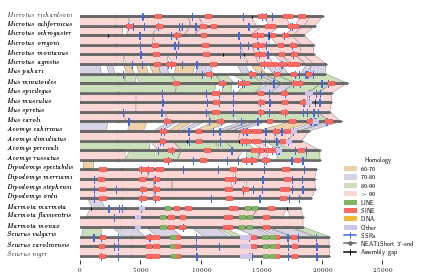

In [42]:
genomes = Rodents

xlim = 28000
text_start = -6000

filename = 'Rodents'
figsize=(8, 6)
fsizeticks = 6
fsizeleg = 6
fontsize=6
namelength = 'long'
print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize,namelength,'','')


<Figure size 576x108 with 0 Axes>

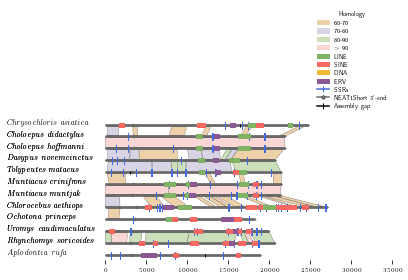

In [24]:
selected = ['GCA_020276665.1_ASM2027666v1', 'GCA_020226025.1_ASM2022602v1', 'GCF_000208655.1_Dasnov3.0',
            'GCA_004027875.1_AplRuf_v1_BIUU', 'GCA_000164785.2_C_hoffmanni-2.0.1', 'GCA_019843965.1_ASM1984396v1',
            'GCA_026826555.1_mTolMat1', 'GCA_028551405.1_Uromys_caudimaculatus_HiC', 'GCF_000296735.1_ChrAsi1.0',
            'GCF_015220235.1_mChoDid1.pri', 'GCA_008782695.1_UCB_Mmun_1.0', 'GCA_921998345.2_WSB_EiJ_v3',
            'GCA_023783515.1_ASM2378351v1', 'GCF_014633375.1_OchPri4.0']
genomes = [i for i in libtree_order if i in selected]

xlim = 35000
text_start = -12000

filename = 'with_ERV'
figsize=(8, 1.5)

fsizeticks = 6
fsizeleg = 6
fontsize=8
namelength = 'long'
print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize,namelength,'','')

<Figure size 864x288 with 0 Axes>

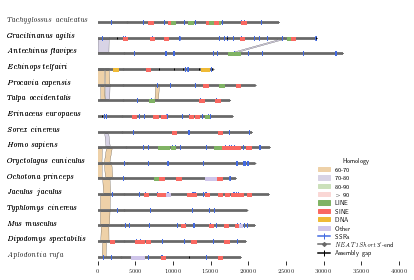

In [143]:
#blast with fragments >= 100bp
genomes = Archetypes[::-1]
xlim = 40000
text_start = -12000
filename = 'Archetypes'
figsize=(12, 4)
fsizeticks = 5
fsizeleg = 6
fontsize=7
namelength = 'long'
print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize, namelength,'','')

<Figure size 1440x720 with 0 Axes>

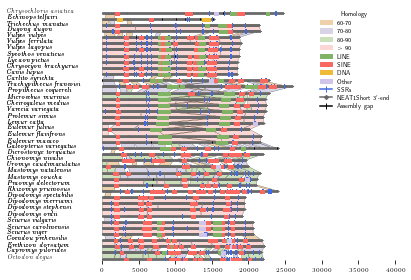

In [85]:
#NEAT1 orthologs with TEs in NEAT1Short
selected = [i for i in TE for el in TE[i] if i in poly and poly[i] and TE[i][el][1] < poly[i][0]]
genomes = [i for i in libtree_order if i in selected]

xlim = 40000
text_start = -13000

filename = 'with_TEs_inNEAT1Short'
figsize=(20, 10)

fsizeticks = 6
fsizeleg = 6
fontsize=6
namelength = 'long'
print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize,namelength,'','')

<Figure size 576x288 with 0 Axes>

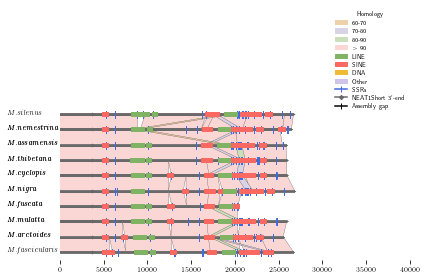

In [27]:
#Macaca genus

genomes = ['GCF_012559485.2_MFA1912RKSv2', 'GCA_021188215.1_Marc_1.0', 'GCF_003339765.1_Mmul_10',
           'GCA_003118495.1_macFus_1.0', 'GCA_928851695.1_mMacNir1.1', 'GCA_026956025.1_MCyc01',
           'GCA_024542745.1_ASM2454274v1', 'GCA_023783095.1_ASM2378309v1', 'GCF_000956065.1_Mnem_1.0',
           'GCA_023807365.1_ASM2380736v1']

xlim = 40000
text_start = -6000

filename = 'Macaca_genus'
figsize=(8, 4)
fsizeticks = 7
fsizeleg = 6
fontsize=7
namelength = 'short'
print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize, namelength,'','')

<Figure size 540x144 with 0 Axes>

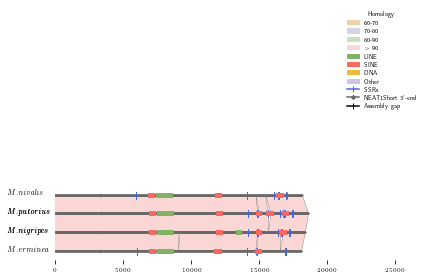

In [31]:
#Mustela genus
genomes = ['GCF_009829155.1_mMusErm1.Pri', 'GCA_022355385.1_MUSNIG.SB6536', 
           'GCA_011764305.2_ASM1176430v1.1', 'GCA_019141155.1_MusNiv_Pri1.0']

xlim = 27000
text_start = -3500

filename = 'Mustela_genus'
figsize=(7.5, 2)
fsizeticks = 6
fsizeleg = 6
fontsize=8
namelength = 'short'
print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize, namelength,'','')

In [32]:
#Select species with several assemblies
species = {}
for item in tax_species:
    if tax_species[item].replace(' ','_') not in species:
        species[tax_species[item].replace(' ','_')] = []
    species[tax_species[item].replace(' ','_')].append(item)
sorted_sp = sorted(species.keys(), key=lambda kv: len(species[kv]),reverse=True)
indisp = {i:species[i] for i in sorted_sp[:10]}
print(indisp.keys())

dict_keys(['MUS_MUSCULUS', 'CANIS_LUPUS', 'SUS_SCROFA', 'ELEPHAS_MAXIMUS', 'HIPPOPOTAMUS_AMPHIBIUS', 'RANGIFER_TARANDUS', 'PANTHERA_TIGRIS', 'OVIS_AMMON', 'PEROMYSCUS_MANICULATUS', 'GIRAFFA_CAMELOPARDALIS'])


<Figure size 576x180 with 0 Axes>

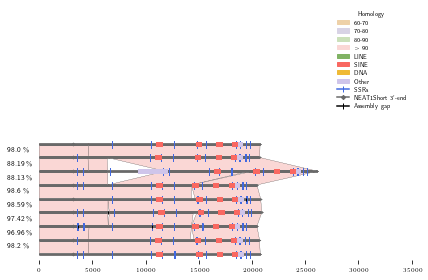

<Figure size 576x180 with 0 Axes>

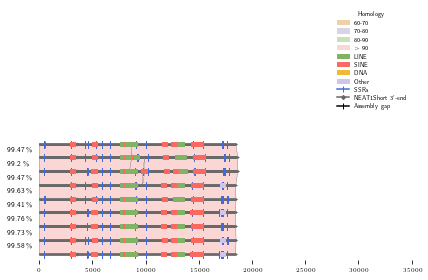

<Figure size 576x180 with 0 Axes>

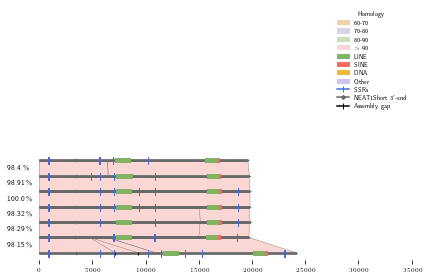

<Figure size 576x180 with 0 Axes>

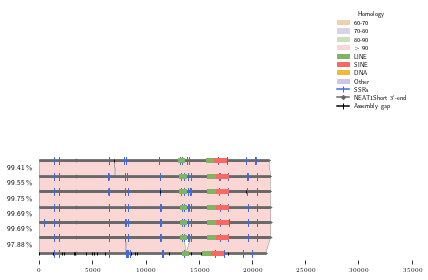

<Figure size 576x180 with 0 Axes>

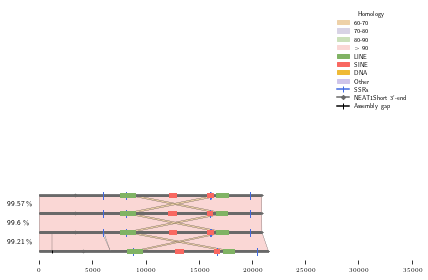

<Figure size 576x180 with 0 Axes>

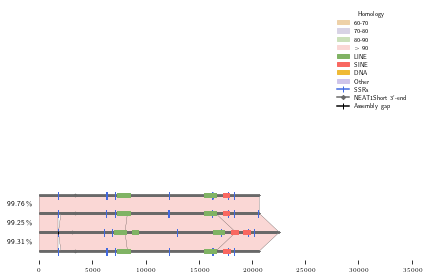

<Figure size 576x180 with 0 Axes>

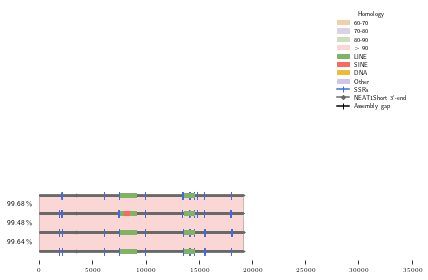

<Figure size 576x180 with 0 Axes>

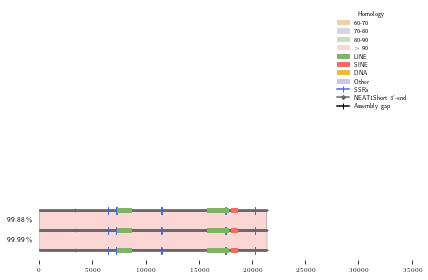

<Figure size 576x180 with 0 Axes>

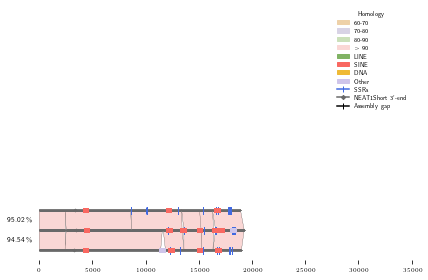

<Figure size 576x180 with 0 Axes>

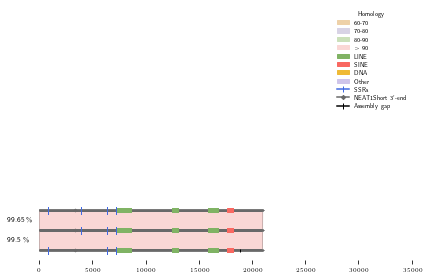

In [41]:
for item in indisp:
    genomes = indisp[item]
    xlim = 35000
    text_start = -12000

    filename = item + '_species'
    figsize=(8, 2.5)
    fsizeticks = 6
    fsizeleg = 6
    fontsize=7
    namelength = 'long'
    print_alignment(genomes, filename, figsize, text_start, xlim,fsizeticks,fsizeleg, fontsize, namelength,'','ANI')

### Plot positions of hexamers

In [133]:
def index_finder_merged(gene,kmer):
    indexes = []
    size = len(kmer[0])
    num_kmers = len(gene) - size + 1
    for i in range(num_kmers):
        loc_kmer = gene[i:i+size]
        if loc_kmer in kmer:
            indexes.append(i)
    return(indexes)

In [134]:
kmers = {'TG':['TGTGTG','GTGTGT'], 'CA':['CACACA','ACACAC'],'AT':['ATATAT','TATATA'],
        'GA':['GAGAGA','AGAGAG'],'CTG':['TCTGTG','CTGTGT'],'ACA':['GACAGA','ACAGAC']}
pos = {}

for item in Archetypes:
    pos[item] = {}

    for km in kmers:
        pos[item][km] = index_finder_merged(seq[item],kmers[km])


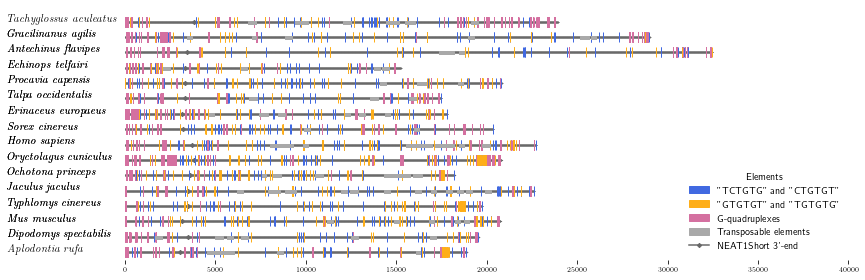

In [139]:

genomes = Archetypes[::-1]
xlim = 40000
text_start = -6500
filename = 'kmers'
figsize=(12, 4)
fsizeticks = 7
fsizeleg = 10
fontsize=11

xstart = 0
plt.figure(figsize=figsize)

for idx in range(1,len(genomes)):

    genome1 = genomes[idx - 1 ]
    genome2 = genomes[idx]

    plt.plot([idx for i in range(length[genome1])],'s',color='dimgray',markersize=0.2)
    #Plot locations of G-quadruplexes
    g = [idx if i in GQ[genome1] else 0 for i in range(length[genome1])]
    plt.plot(g, '|',markersize=10,color=colormap['g4'])
    #Plot location of PAS
    pa = [idx if i in poly[genome1] else 0 for i in range(length[genome1])]
    plt.plot(pa, 'D',markersize=3,color=colormap['polya'])
    #Plot locations of 6-mers, group CTG
    kmer = 'CTG'
    pm = [idx if i in pos[genome1][kmer] else 0 for i in range(length[genome1])]
    plt.plot(pm, '|',markersize=10,color='royalblue')
    #Plot locations of 6-mers, group TG
    kmer = 'TG'
    pm = [idx if i in pos[genome1][kmer] else 0 for i in range(length[genome1])]
    plt.plot(pm, '|',markersize=10,color='#feae19')


    #Plot locations of TEs
    if genome1 in TE:
        for element in TE[genome1]:
            a = [idx if i in range(TE[genome1][element][1],TE[genome1][element][2]) else 0 for i in range(length[genome1])]
            plt.plot(a, 's',markersize=3,color='darkgrey')

    if namelength == 'long':
        genname1 = '\ '.join(latin[genome1].split(' ')[:2])
        genname2 = '\ '.join(latin[genome2].split(' ')[:2])
    plt.text(text_start, idx, r"$\mathit{" + genname1 + "}$",fontsize=fontsize, fontstyle='italic')
    plt.text(text_start, idx+1, r"$\mathit{" + genname2 + "}$",fontsize=fontsize, fontstyle='italic')
    idx += 1
    
    
plt.plot([idx for i in range(length[genome2])],'s',color='dimgray',markersize=0.2)
#Plot location of PAS
pa = [idx if i in poly[genome2] else 0 for i in range(length[genome2])]
plt.plot(pa, 'D',markersize=3,color=colormap['polya'])

#Plot locations of 6-mers, group CTG
kmer = 'CTG'
pm = [idx if i in pos[genome2][kmer] else 0 for i in range(length[genome2])]
plt.plot(pm, '|',markersize=10,color='royalblue')
#Plot locations of 6-mers, group TG
kmer = 'TG'
pm = [idx if i in pos[genome2][kmer] else 0 for i in range(length[genome2])]
plt.plot(pm, '|',markersize=10,color='#feae19')

#Plot locations of G-quadruplexes
g = [idx if i in GQ[genome2] else 0 for i in range(length[genome2])]
plt.plot(g, '|',markersize=10,color=colormap['g4'])
#Plot locations of TEs
if genome2 in TE:
    for element in TE[genome2]:
        a = [idx if i in range(TE[genome2][element][1],TE[genome2][element][2]) else 0 for i in range(length[genome2])]
        plt.plot(a, 's',markersize=3,color='darkgrey')

plt.xlim([0,xlim])
plt.ylim([0.5,len(genomes) + 1])
plt.yticks([])
plt.xticks(fontsize=fsizeticks)

patch_70 = mpatches.Patch(color='royalblue', label='"TCTGTG" and "CTGTGT"')

patch_80 = mpatches.Patch(color='#feae19', label='"GTGTGT" and "TGTGTG"')
patch_90 = mpatches.Patch(color=colormap['g4'], label='G-quadruplexes')
patch_te = mpatches.Patch(color='darkgrey', label='Transposable elements')
patch_polya = mlines.Line2D([],[],color=colormap['polya'],marker='D',markersize=3,label='NEAT1Short 3\'-end')


plt.legend(handles=[patch_70,patch_80,patch_90,patch_te,patch_polya], 
           fontsize = fsizeleg,title='Elements',frameon=False)


plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1_' + filename + '.png',dpi=300)

### Plot highly numerous hexamers in individual archetypes

In [52]:
kmerlist = ['CAGGTG','TGAACA','TCACAC','CCCGCC','GAGTGT','GGAGAG','GCAGAG','AGACAG']
pos = {}
for item in Archetypes:
    pos[item] = {}
    for km in kmerlist:
        pos[item][km] = index_finder_merged(seq[item],[km])


In [54]:
toprint = {'GCF_015852505.1_mTacAcu1.pri':['GCAGAG','AGACAG'],
          'GCA_016432865.2_AdamAnt_v2':['GGAGAG'],
          'GCF_000296755.1_EriEur2.0':['CAGGTG'],
         'GCA_013371645.1_OryCun3.0':['TGAACA','TCACAC','CCCGCC']}

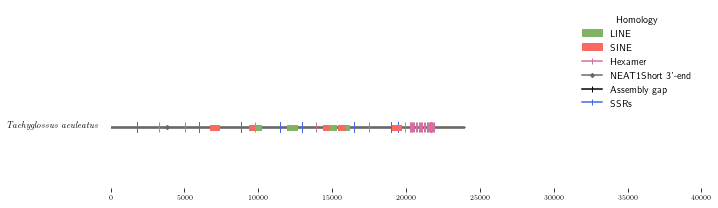

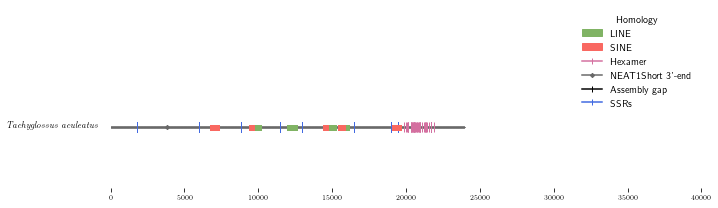

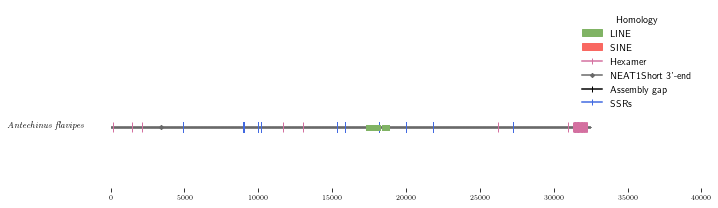

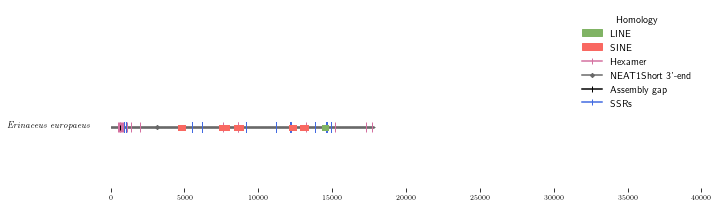

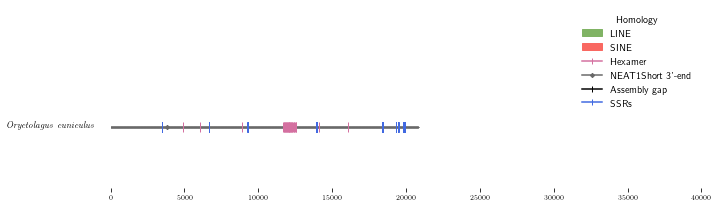

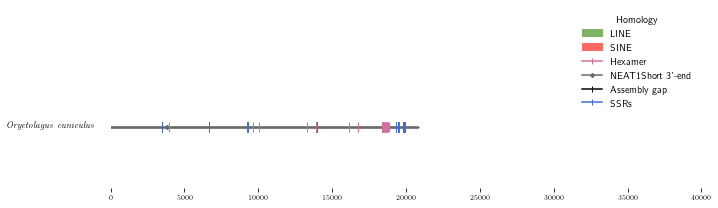

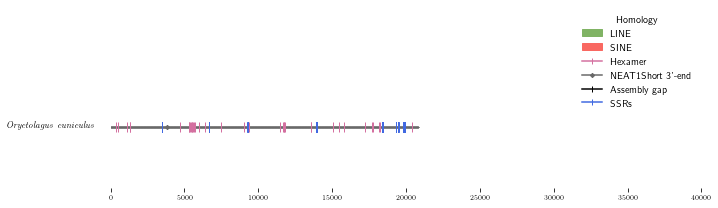

In [64]:
xlim = 40000
text_start = -7000
filename = 'kmers'
figsize=(10, 3)
fsizeticks = 7
fsizeleg = 10
fontsize=9




for genome1 in toprint:
    for kmer in toprint[genome1]:
        xstart = 0
        plt.figure(figsize=figsize)
        idx = 1

        filename = genome1 + '_' + kmer

        plt.plot([idx for i in range(length[genome1])],'s',color='dimgray',markersize=0.2)


        pa = [idx if i in poly[genome1] else 0 for i in range(length[genome1])]
        if genome1 in ssr:
            sp = [idx if ssr[genome1][i] == -1 else 0 for i in range(length[genome1])]
            plt.plot(sp, '|',markersize=10,color=colormap['ssr'])
        plt.plot(pa, 'D',markersize=3,color=colormap['polya'])

        pm = [idx if i in pos[genome1][kmer] else 0 for i in range(length[genome1])]
        plt.plot(pm, '|',markersize=10,color=colormap['kmer'])
        if genome1 in gaps:
            g = [idx if i in gaps[genome1] else 0 for i in range(length[genome1])]
            plt.plot(g, '|',markersize=5,color='black')

        if genome1 in TE:
            for element in TE[genome1]:
                if 'DNA' in element:
                    color=colormap['DNA']
                elif 'SINE' in element:
                    color=colormap['SINE']
                elif 'LINE' in element:
                    color = colormap['LINE']
                else:
                    color=colormap['Other']
                a = [idx if i in range(TE[genome1][element][1],TE[genome1][element][2]) else 0 for i in range(length[genome1])]
                plt.plot(a, 's',markersize=5,color=color)

        genname1 = '\ '.join(latin[genome1].split(' ')[:2])
        plt.text(text_start, idx, r"$\mathit{" + genname1 + "}$",fontsize=fontsize, fontstyle='italic')


        plt.xlim([0,xlim])
        plt.ylim([0.5,2])
        plt.yticks([])
        plt.xticks(fontsize=fsizeticks)


        patch_LINE = mpatches.Patch(color=colormap['LINE'], label='LINE')
        patch_SINE = mpatches.Patch(color=colormap['SINE'], label='SINE')
        patch_polya = mlines.Line2D([],[],color=colormap['polya'],marker='D',markersize=3,label='NEAT1Short 3\'-end')
        patch_gap = mlines.Line2D([],[],color='black',marker='|',markersize=6,label='Assembly gap')
        patch_te = mlines.Line2D([],[],color=colormap['ssr'],marker='|',markersize=6,label='SSRs')
        patch_kmer = mlines.Line2D([],[],color=colormap['g4'],marker='|',markersize=6,label='Hexamer')
        plt.legend(handles=[patch_LINE,patch_SINE,patch_kmer,patch_polya,patch_gap,patch_te], 
                   fontsize = fsizeleg,title='Homology %',frameon=False)

        plt.box(False)
        plt.tight_layout()
        plt.savefig('./FiguresPublication/NEAT1_' + filename + '.png',dpi=400)

### Plot sequence complexity along the gene

In [ ]:
#Function to estimate the sequence complexity
#Input: DNA sequence
#Complexity is estimated as a multiplication of the proportions of unique kmers over total number of kmers
# for kmers of length 5,6 and 7
def complexity(s):
    l = []
    for size in [5,6,7]:
        num_kmers = len(s) - size + 1
        div = {}
        for i in range(num_kmers):
            loc_kmer = s[i:i+size]
            div[loc_kmer] = ''
        l.append(len(div)/num_kmers)
    return(l[0]*l[1]*l[2])


for gene in Archetypes:
    val = []
    for i in range(0,len(seq[gene]),250):
        frag = seq[gene][i:i+250]
        if len(frag) > 200:
            val.append(complexity(frag))
    pos = [i for i in range(len(val))]

    plt.figure(figsize=(12, 1.5))
    plt.plot(pos,val,color='dimgray')
    plt.hlines(np.mean(val),xmin=0,xmax=len(pos),linestyle='dashed',color='black',linewidth=0.5)
    plt.xticks([i for i in range(0,len(pos),5)],[i*250 for i in range(0,len(pos),5)],fontsize=5,rotation=45)
    plt.yticks(fontsize=5)
    plt.ylim(0,1)
    plt.box(False)
    plt.tight_layout()
    plt.savefig('./FiguresPublication/NEAT1_' + gene + '.pdf',dpi=300)

### Make plots with self-complementary connections/regions only

In [86]:
# Adjust the parsing of the blast output to collect only reverse-complementary patches
blastrc = {}
c = 1
with open('./BLAST_all_vs_all/NEAT1_all_vs_all.txt') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if int(dat[7]) < int(dat[6]):
            if dat[0] not in blastrc:
                blastrc[dat[0]] = {}
            if dat[1] not in blastrc[dat[0]]:
                blastrc[dat[0]][dat[1]] = {}
            a = [int(dat[4]),int(dat[6])]
            b = [int(dat[5]),int(dat[7])]
            blastrc[dat[0]][dat[1]][c] = [a,b,int(round(float(dat[3]),0))]
            c += 1

/home/ksenia/anaconda3/envs/sc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


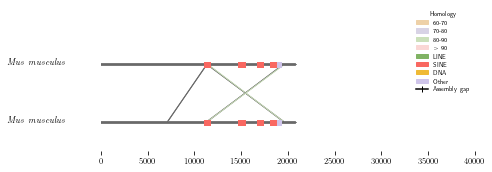

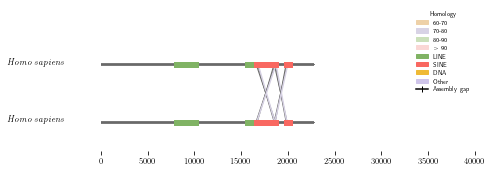

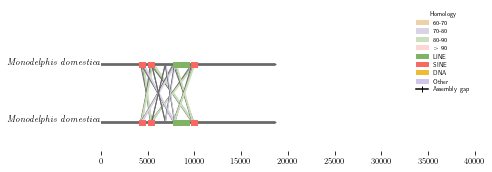

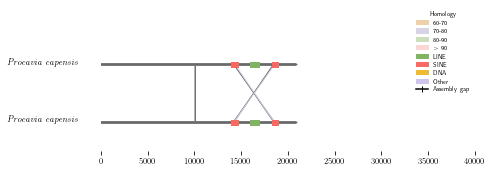

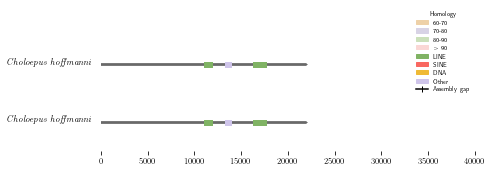

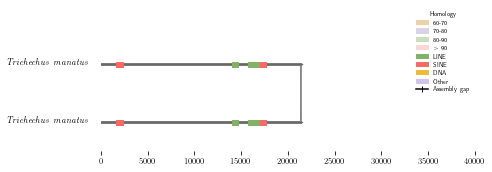

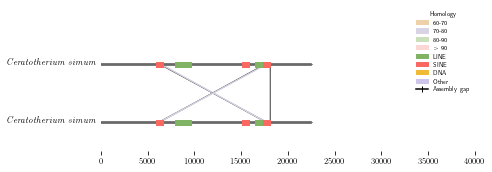

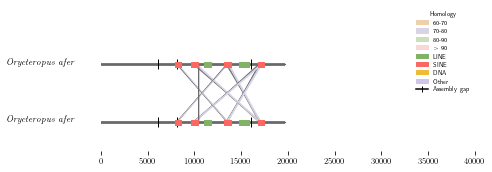

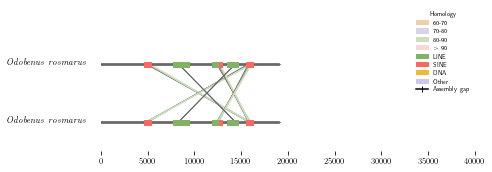

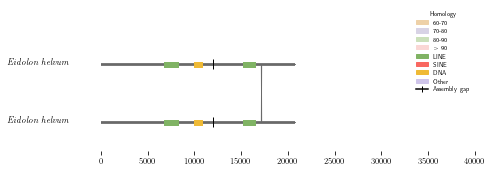

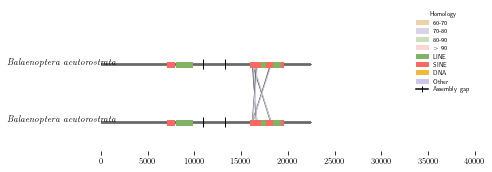

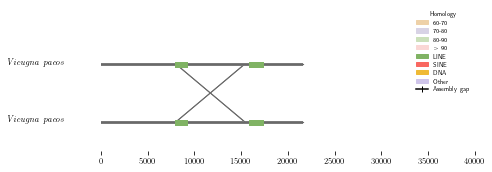

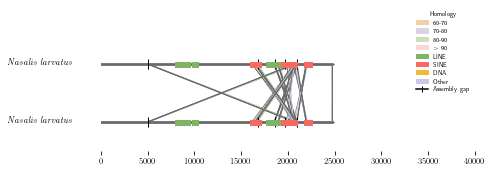

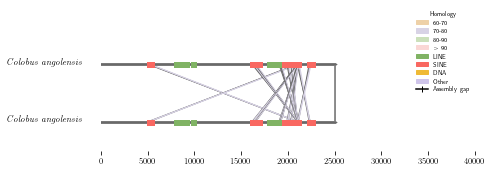

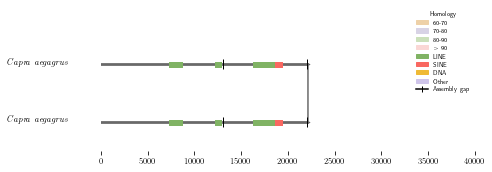

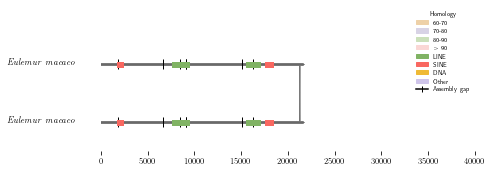

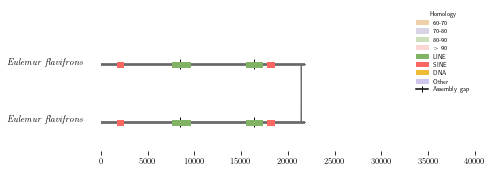

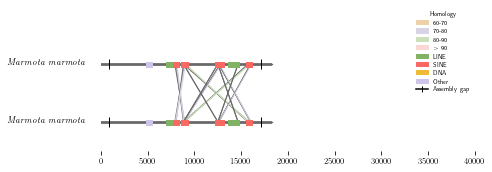

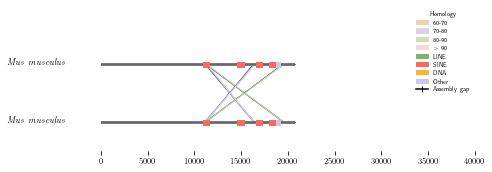

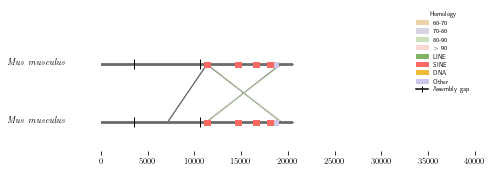

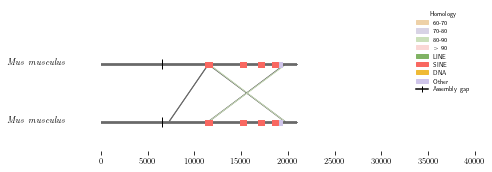

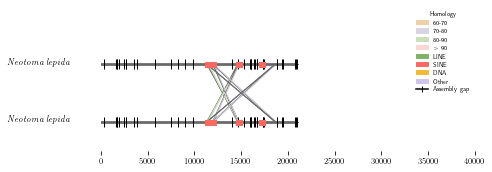

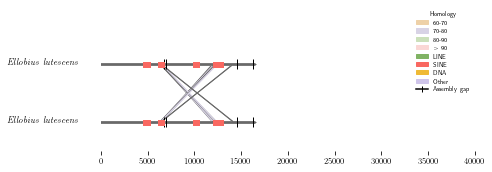

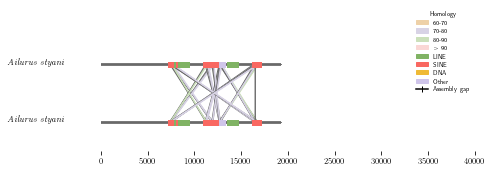

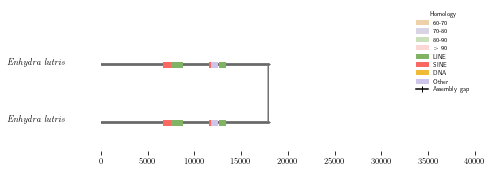

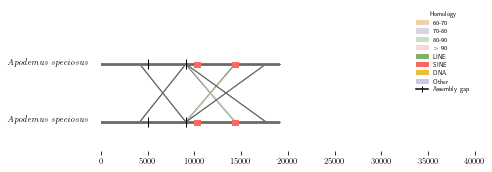

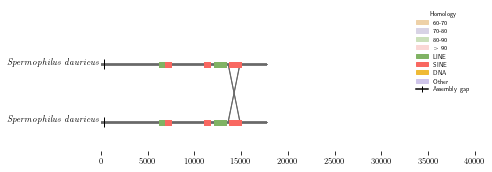

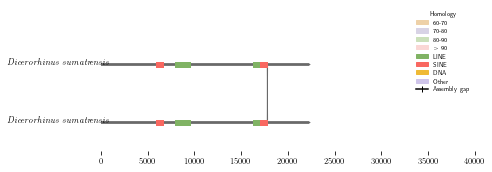

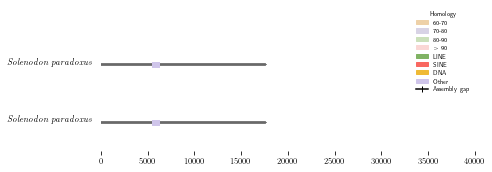

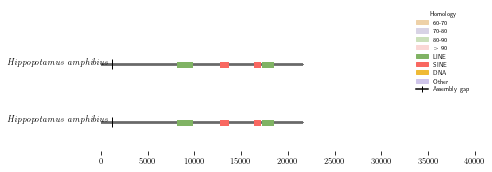

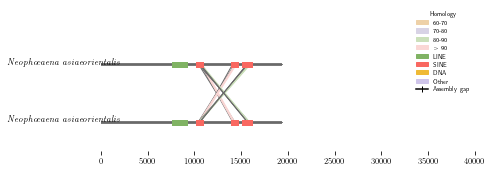

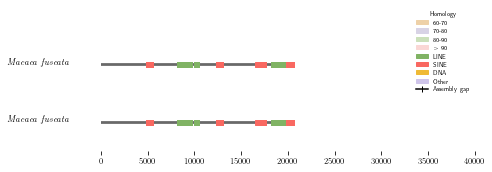

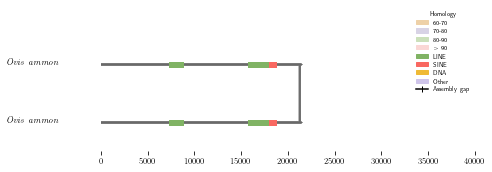

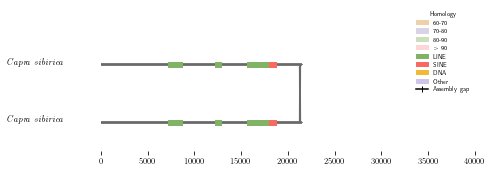

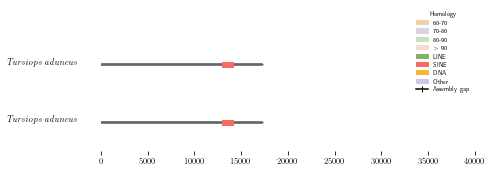

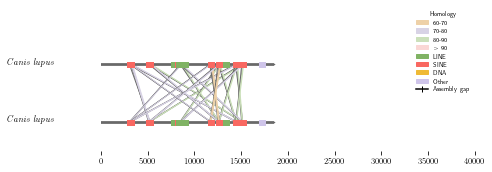

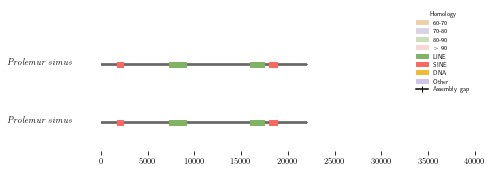

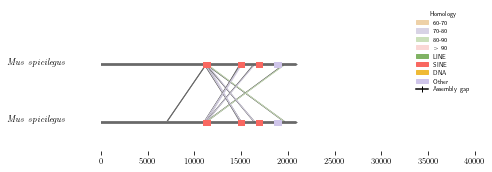

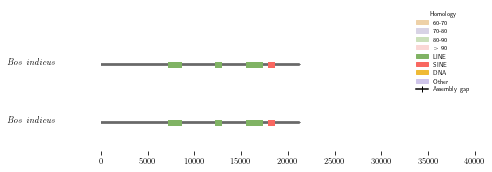

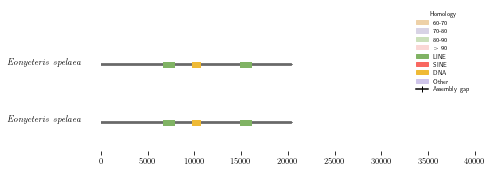

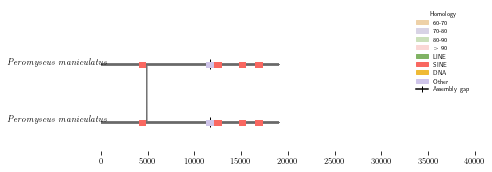

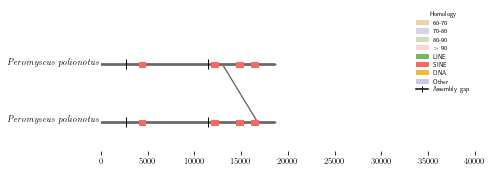

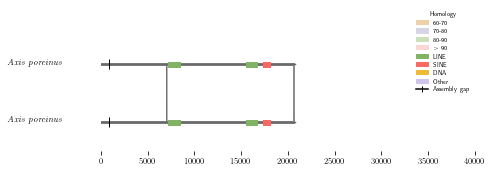

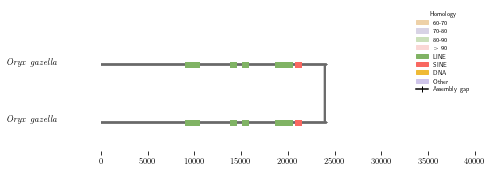

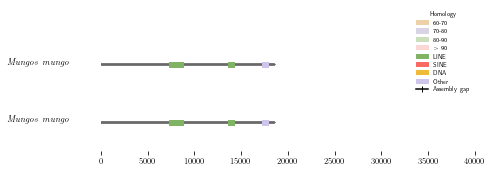

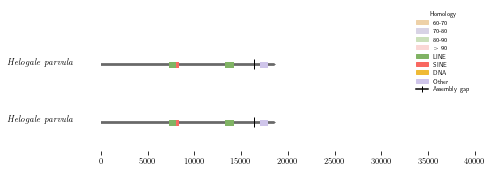

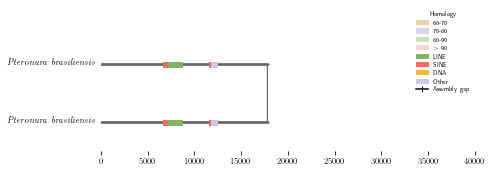

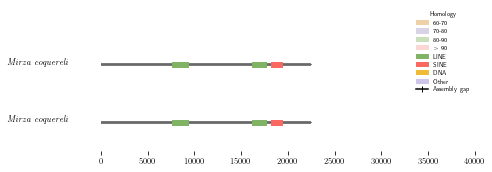

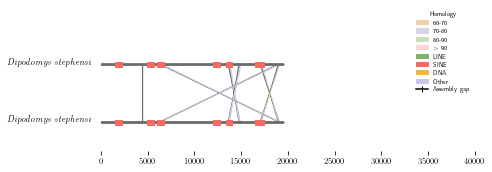

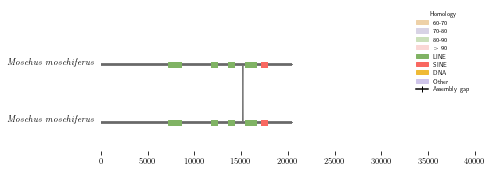

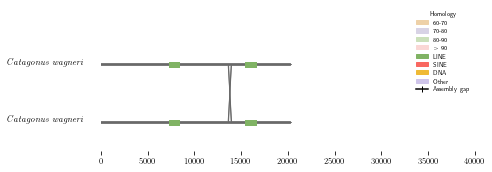

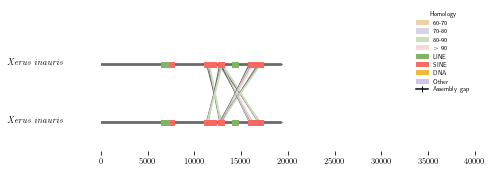

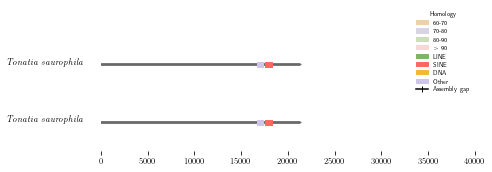

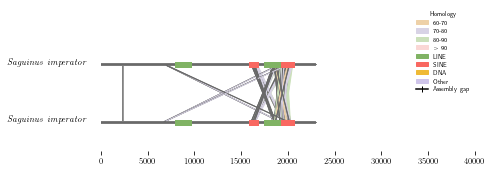

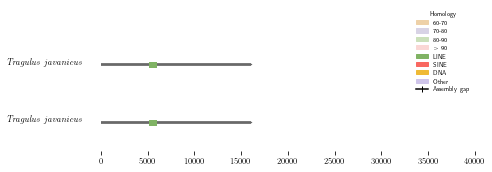

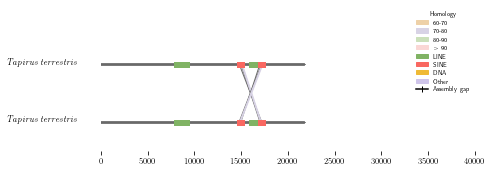

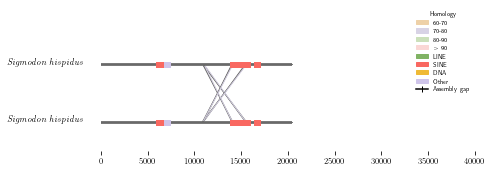

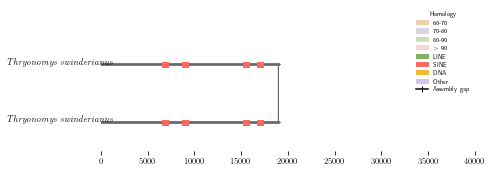

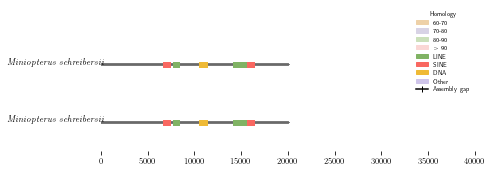

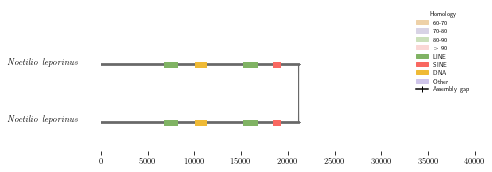

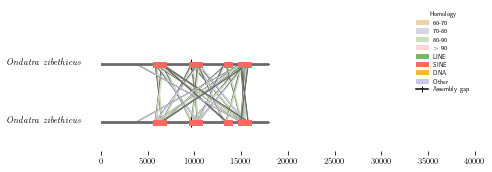

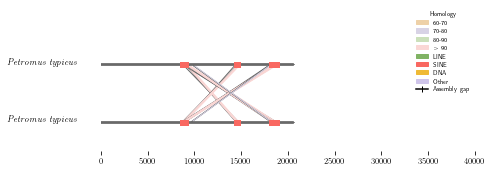

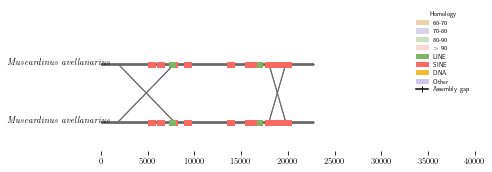

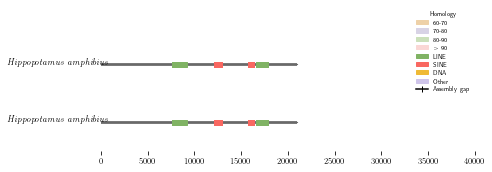

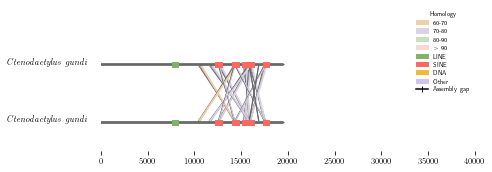

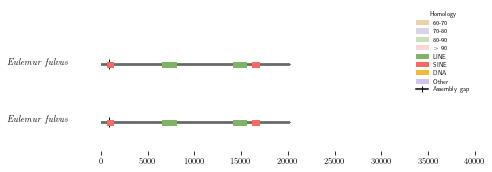

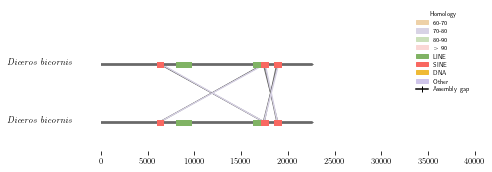

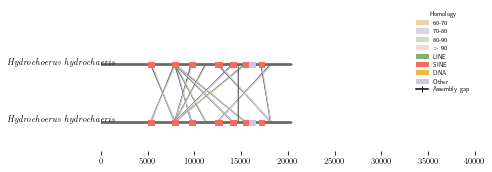

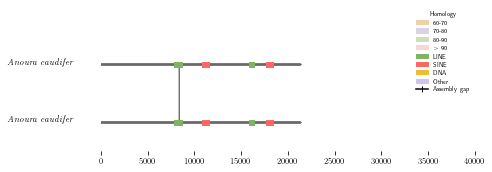

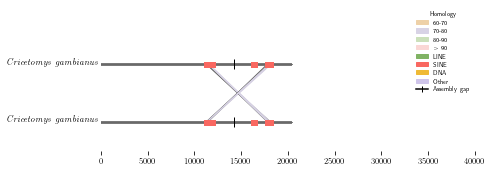

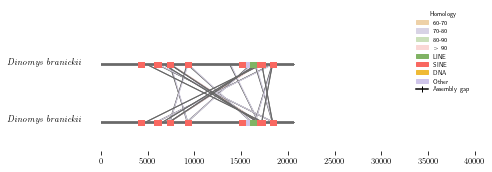

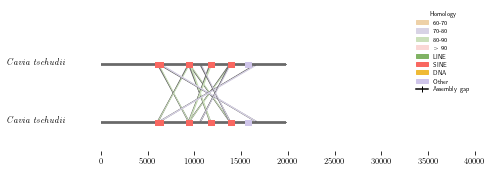

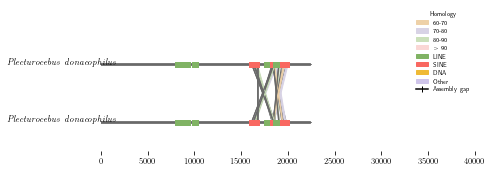

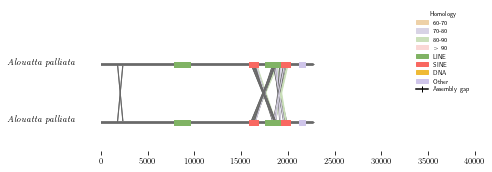

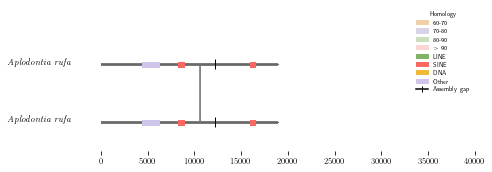

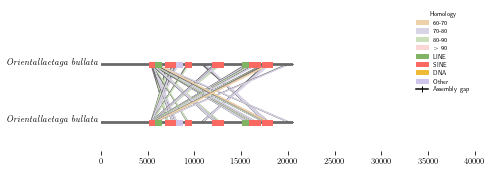

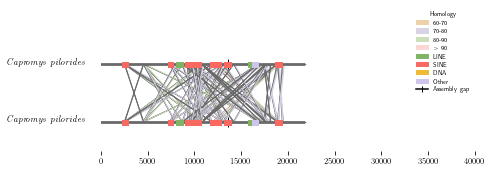

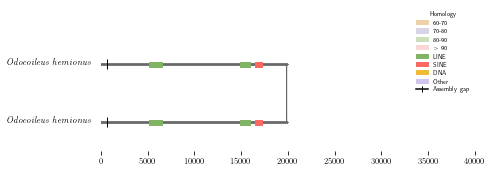

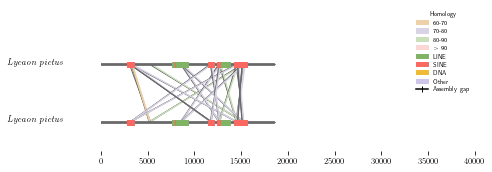

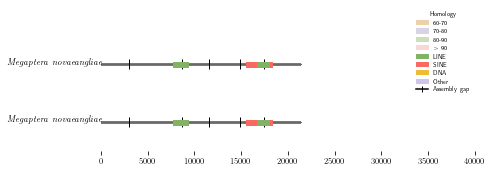

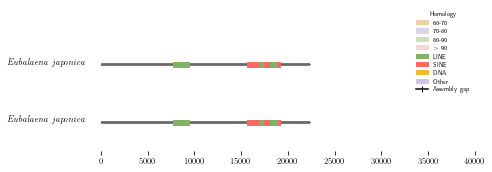

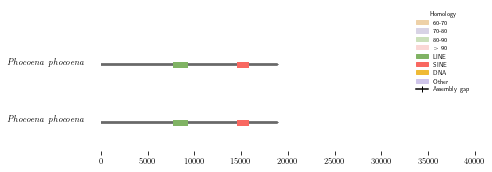

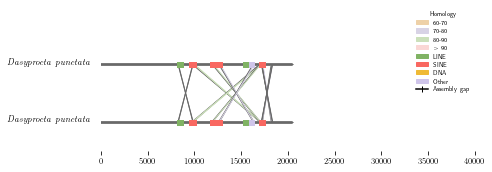

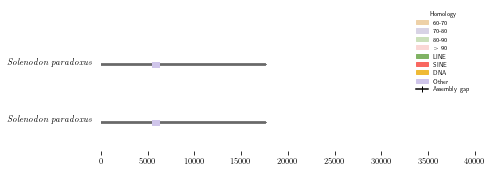

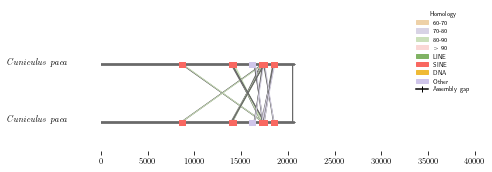

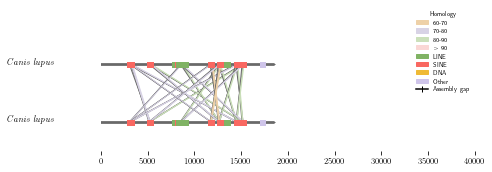

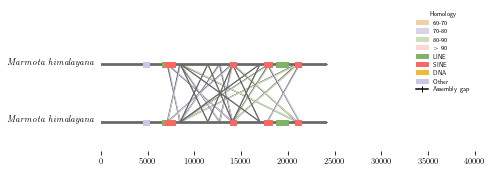

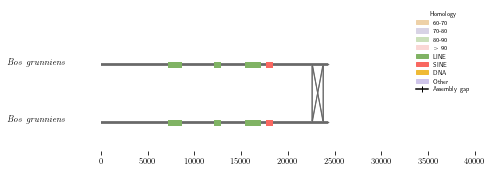

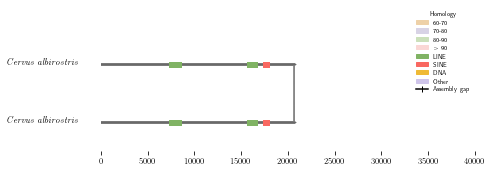

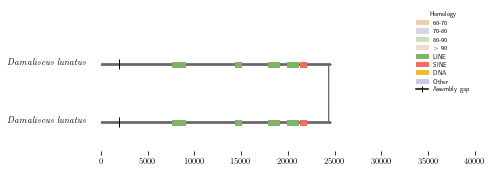

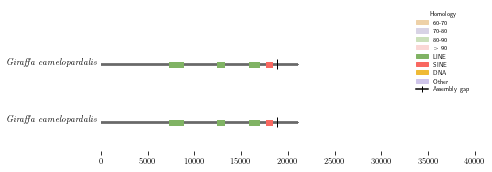

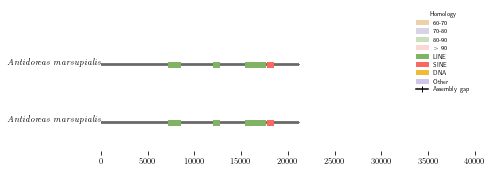

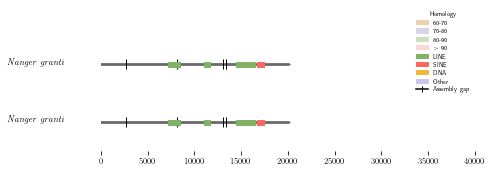

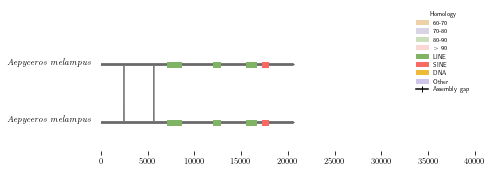

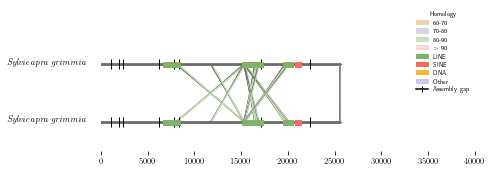

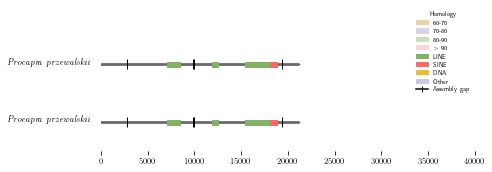

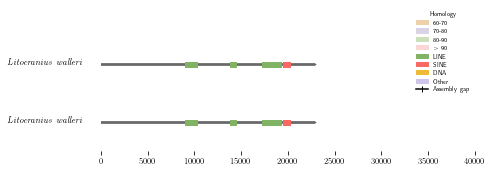

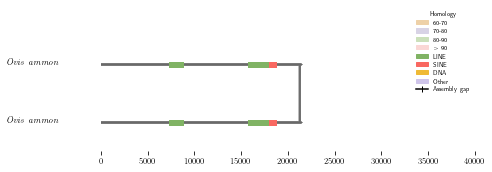

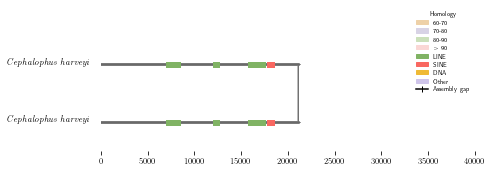

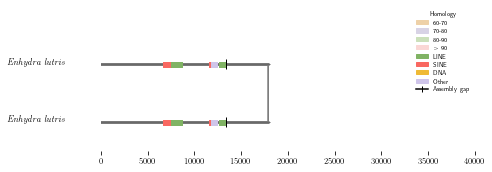

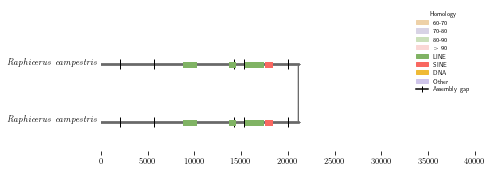

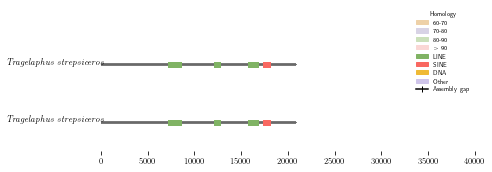

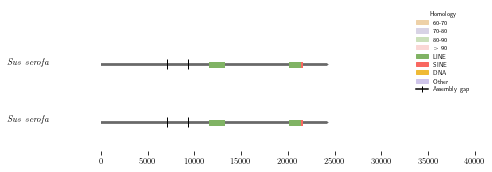

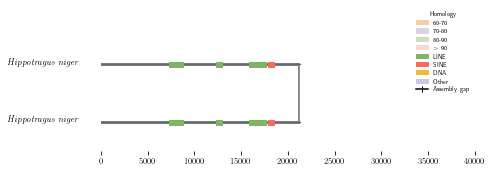

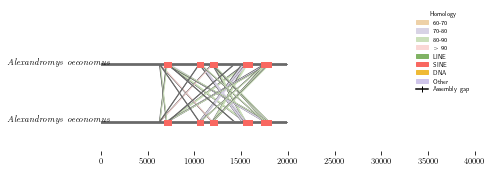

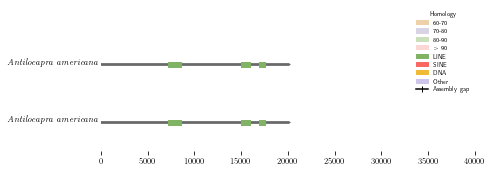

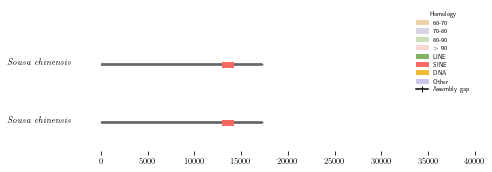

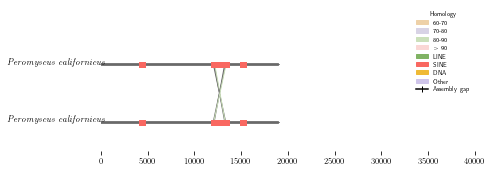

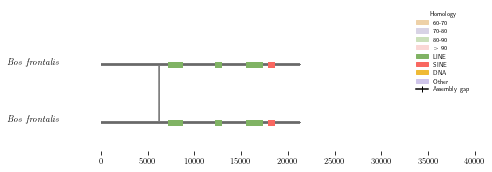

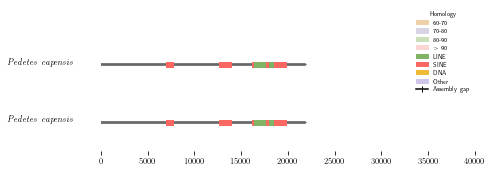

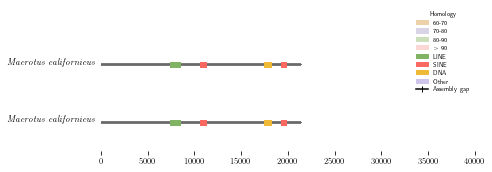

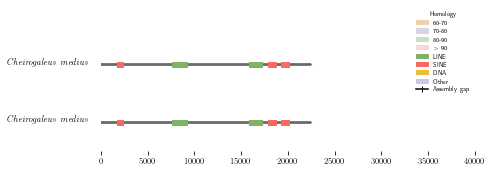

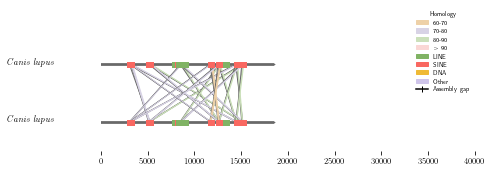

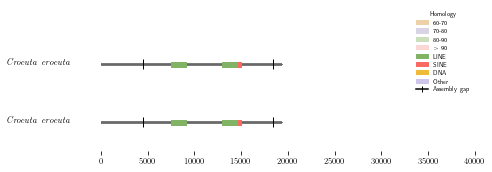

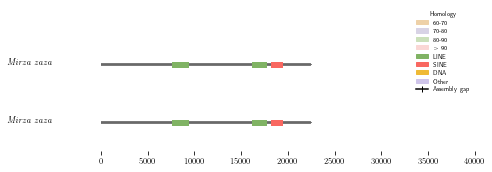

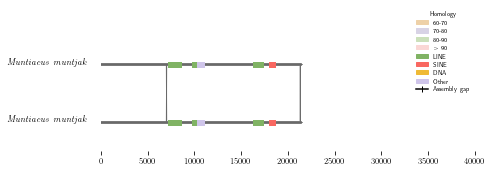

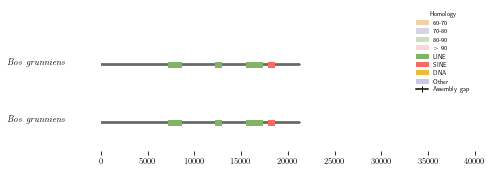

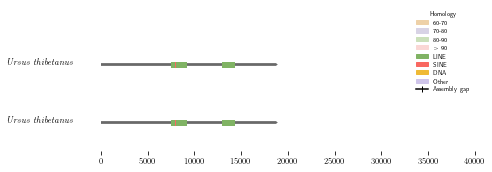

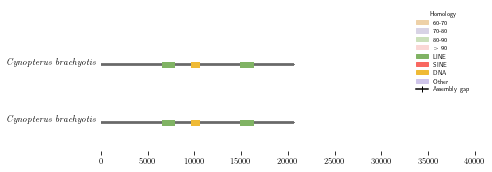

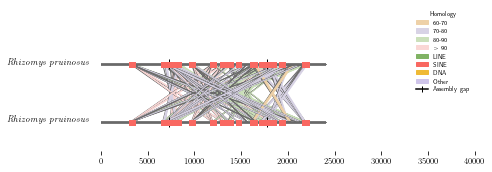

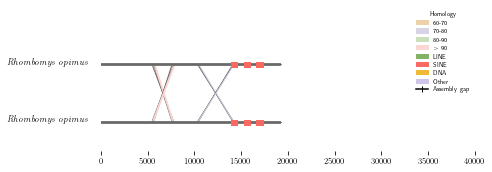

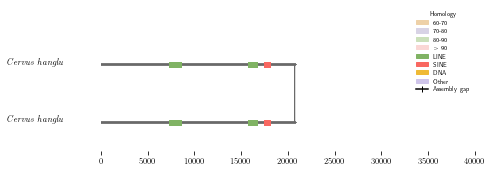

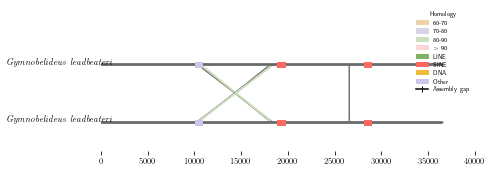

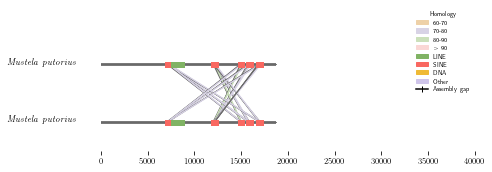

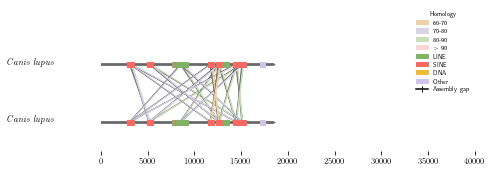

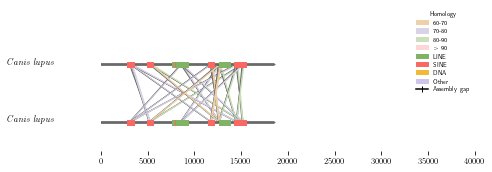

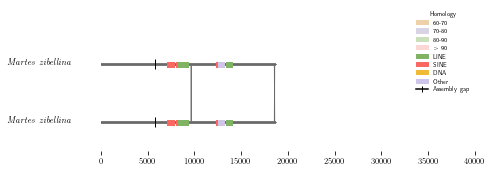

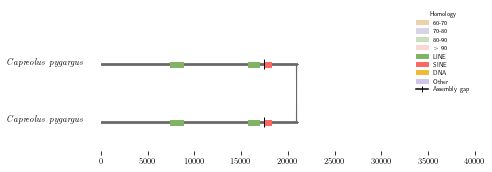

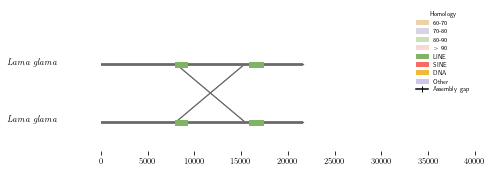

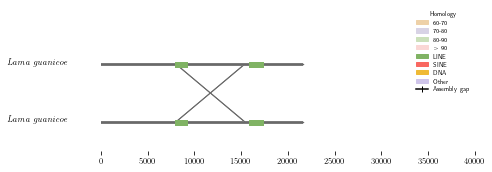

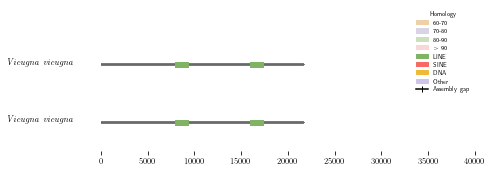

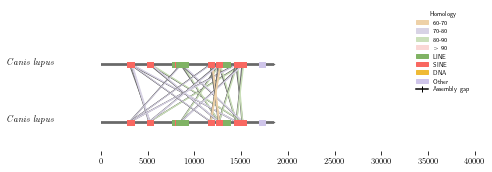

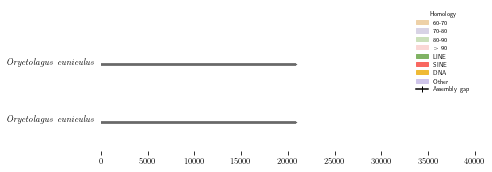

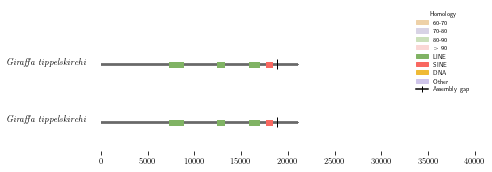

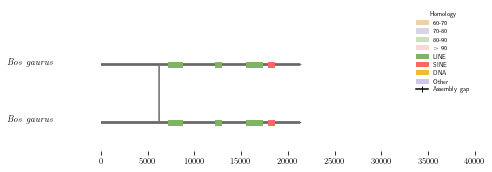

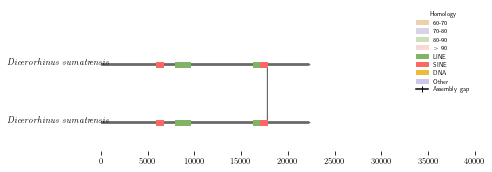

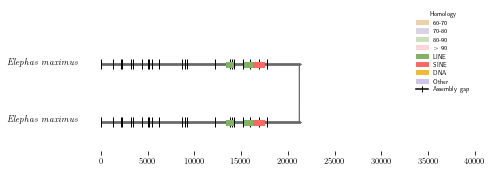

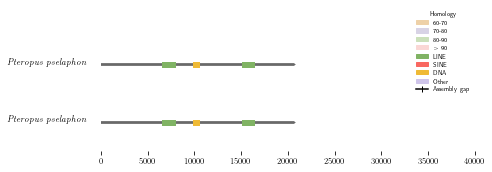

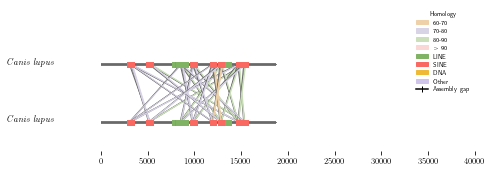

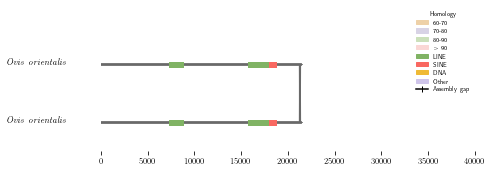

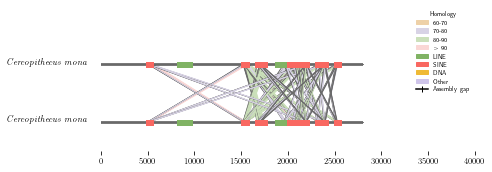

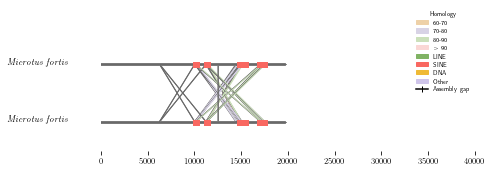

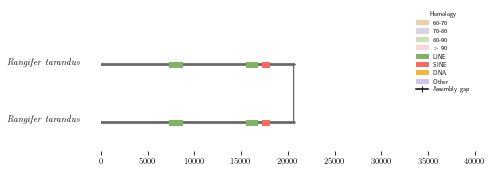

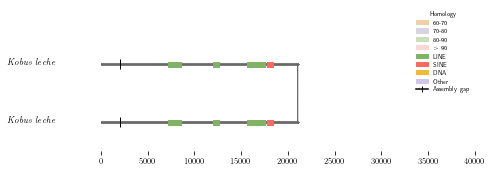

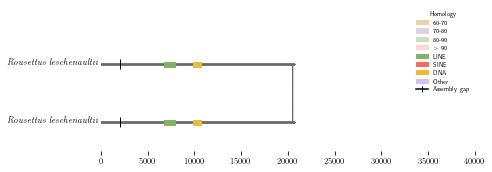

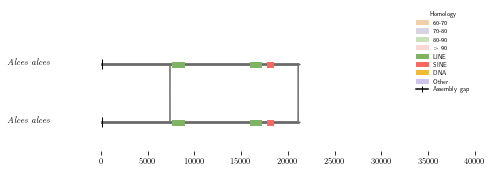

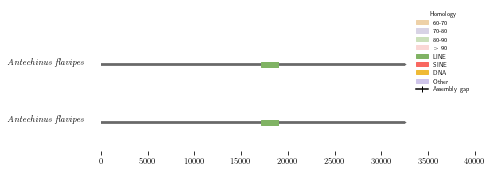

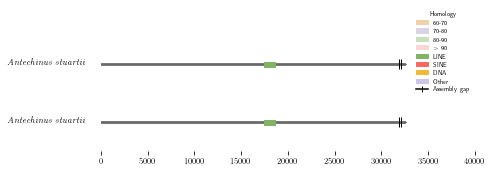

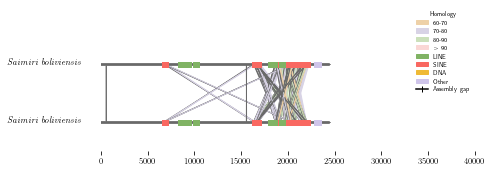

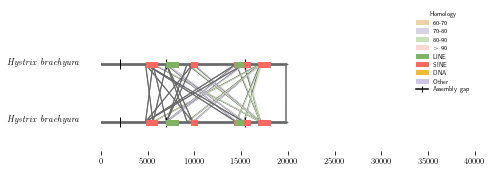

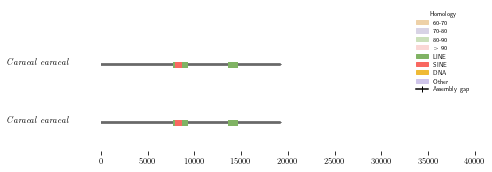

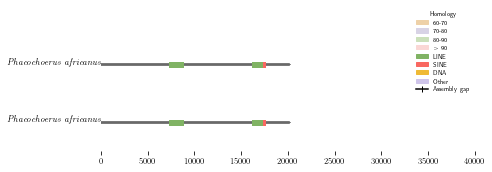

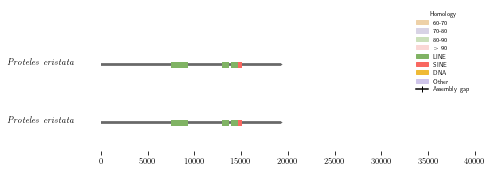

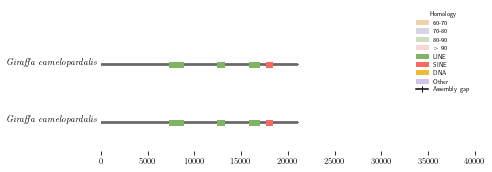

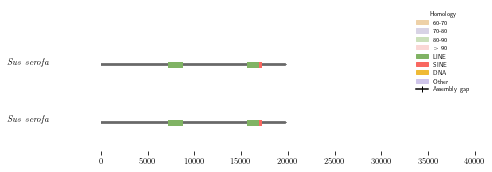

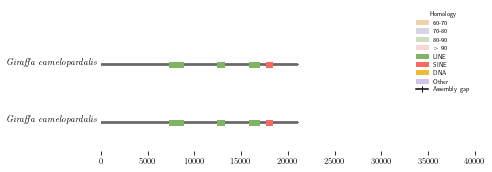

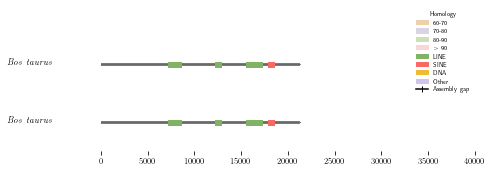

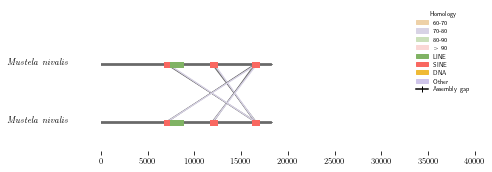

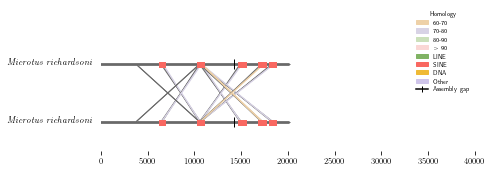

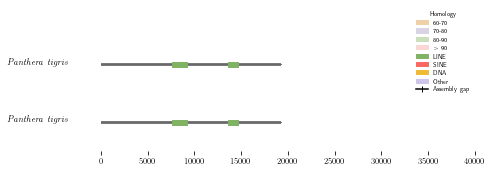

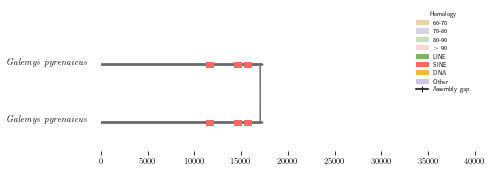

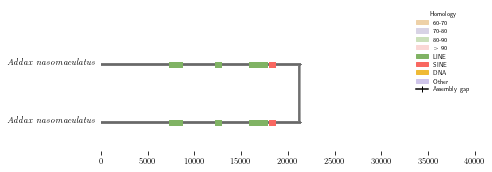

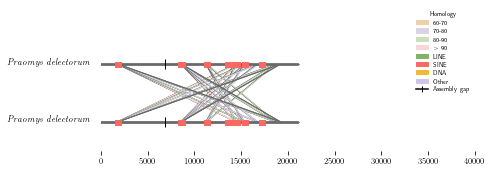

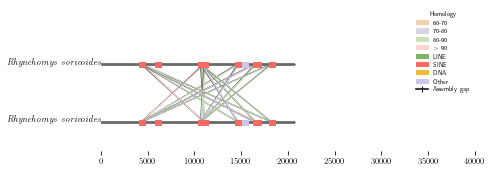

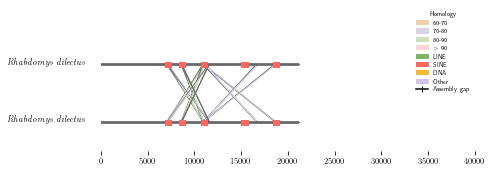

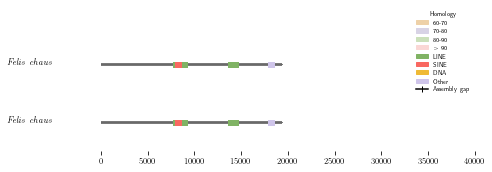

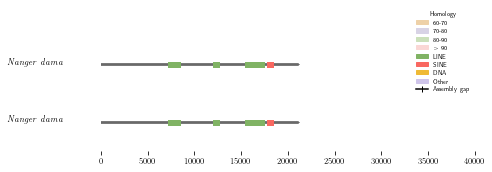

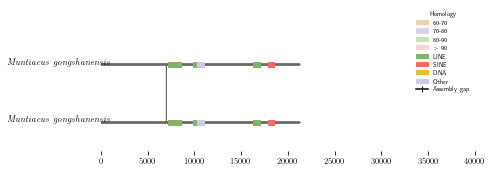

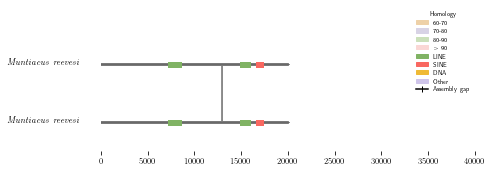

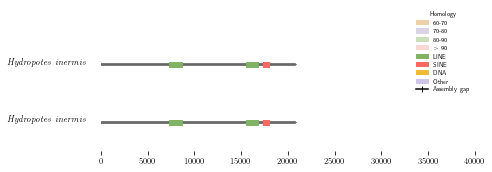

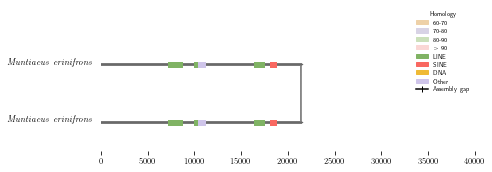

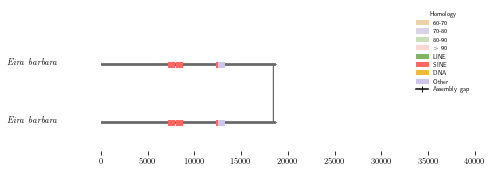

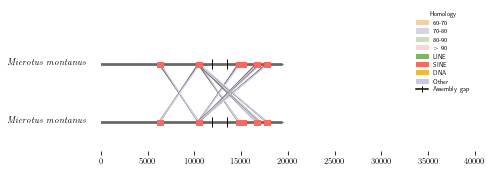

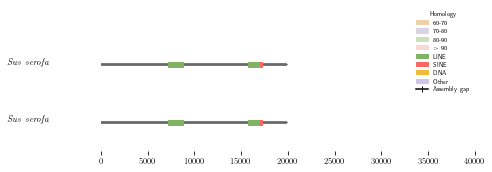

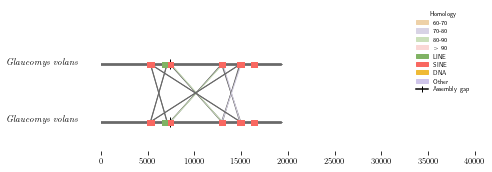

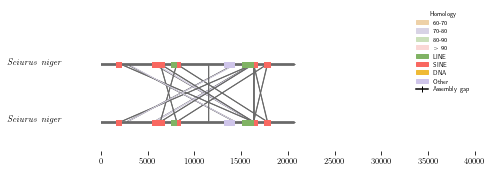

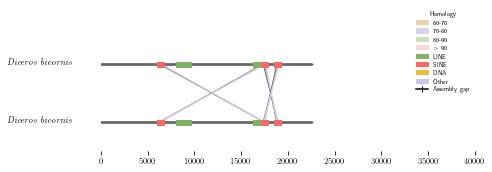

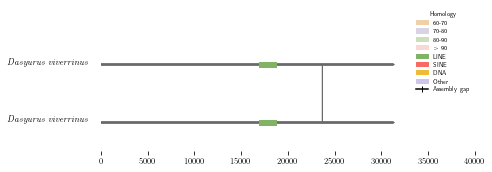

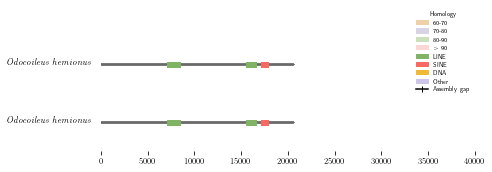

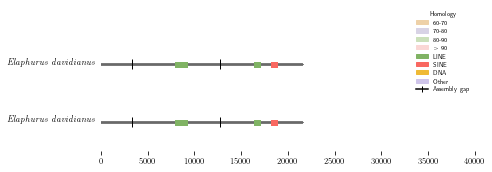

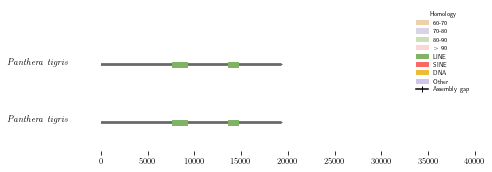

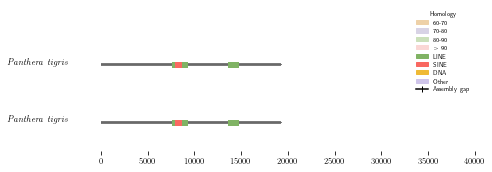

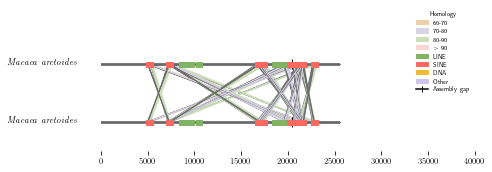

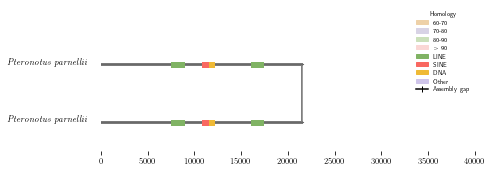

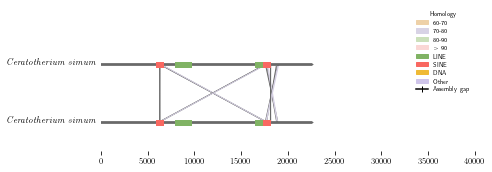

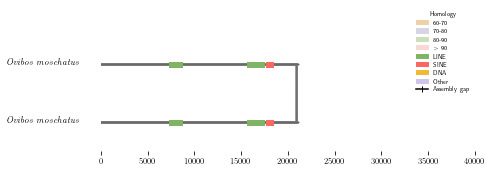

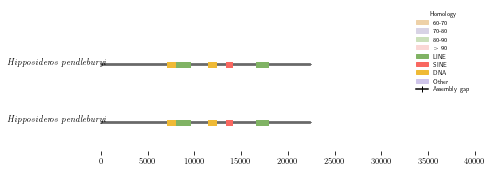

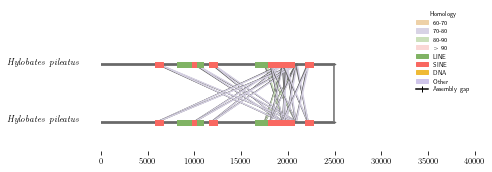

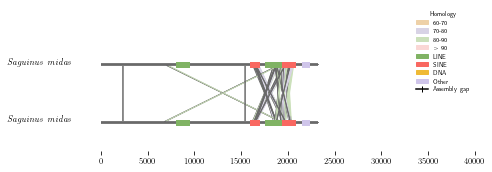

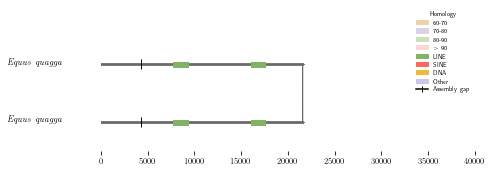

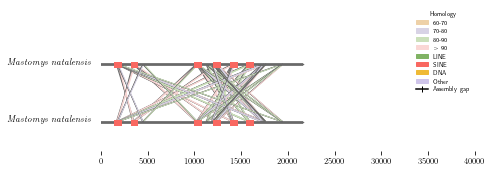

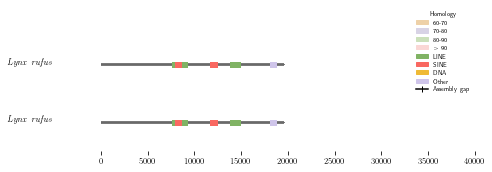

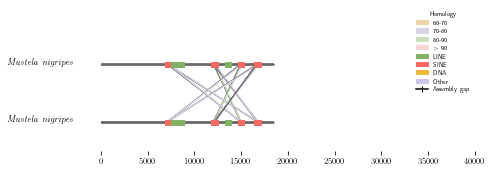

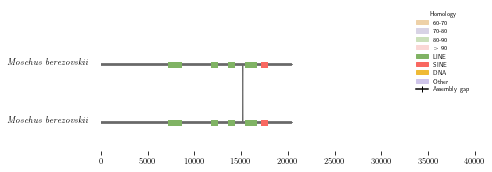

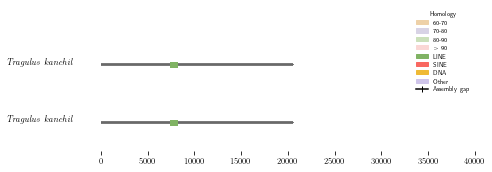

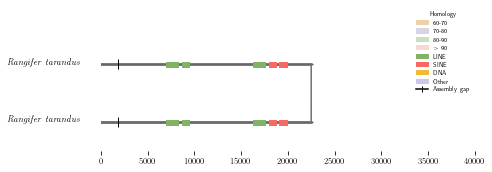

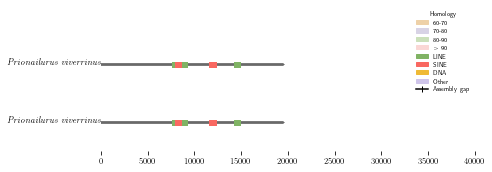

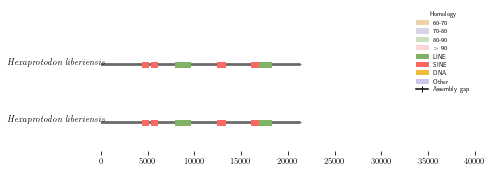

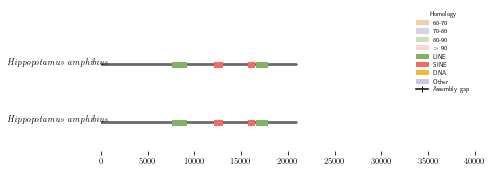

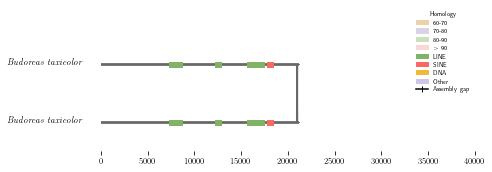

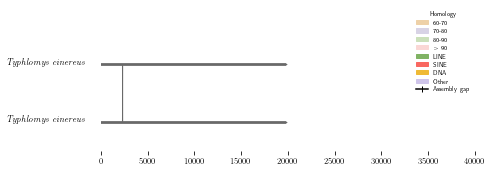

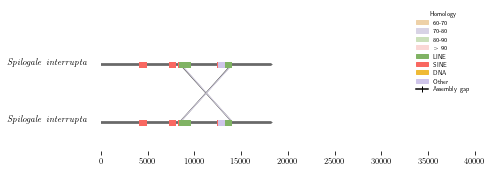

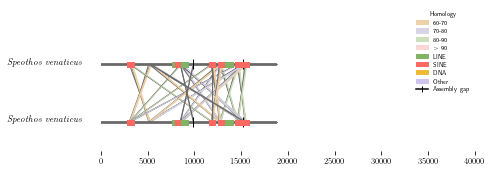

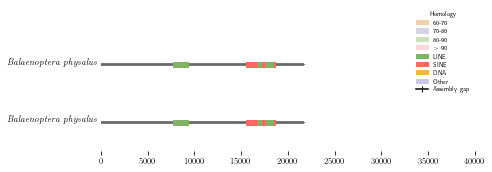

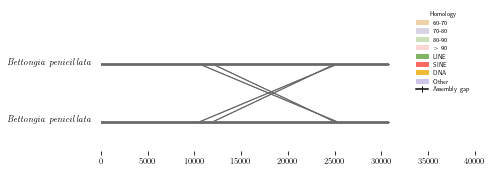

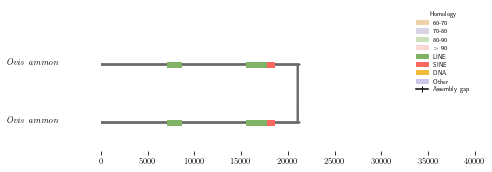

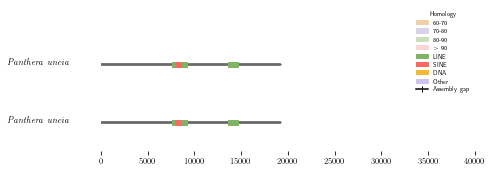

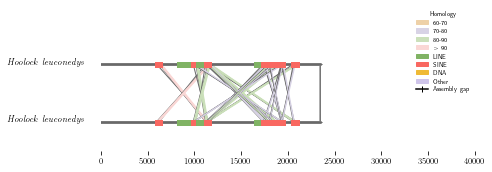

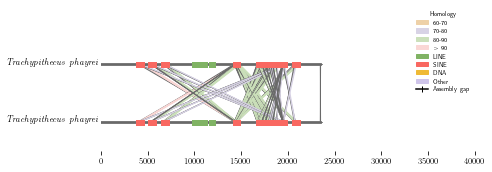

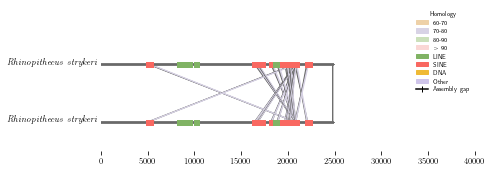

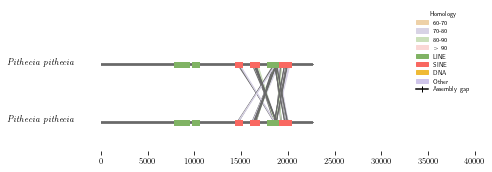

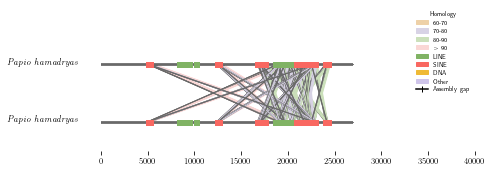

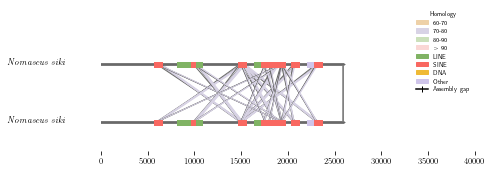

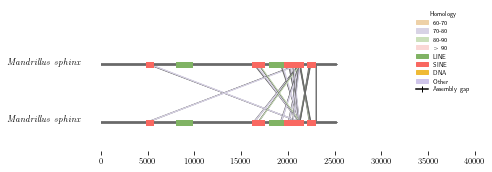

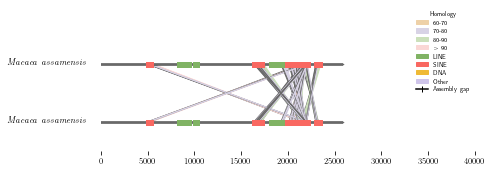

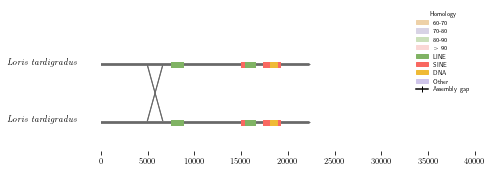

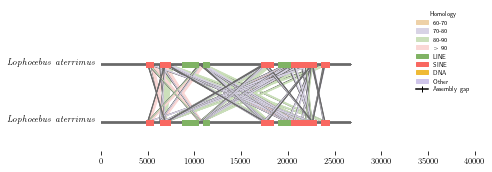

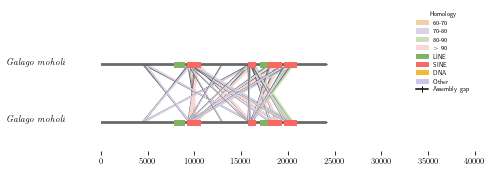

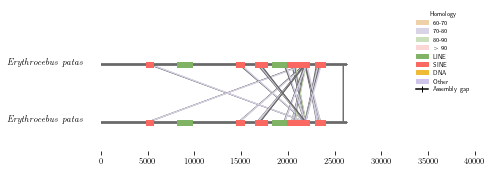

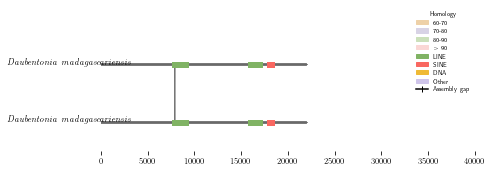

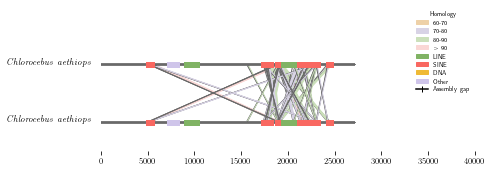

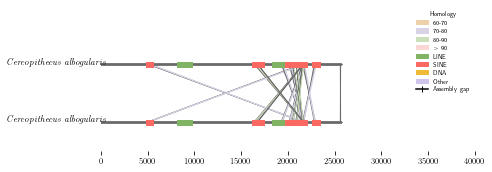

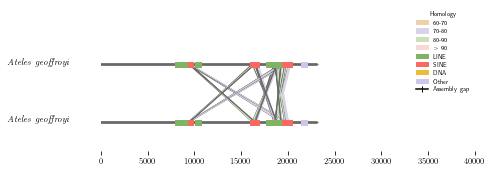

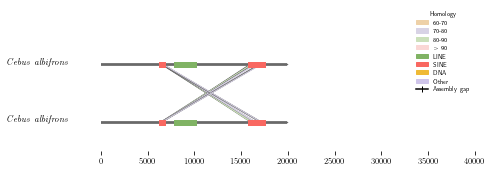

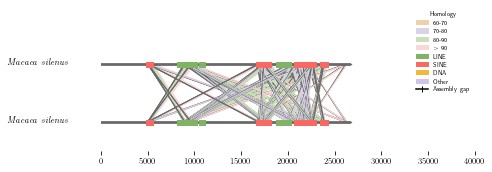

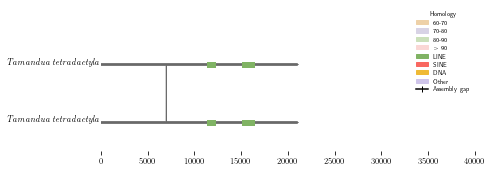

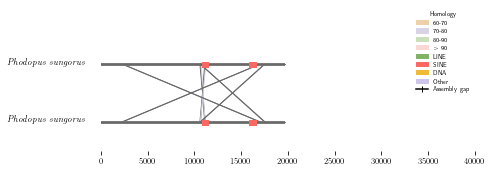

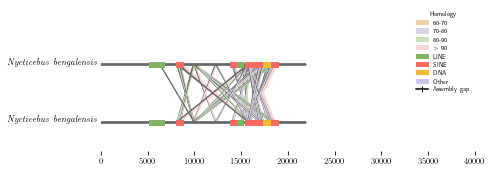

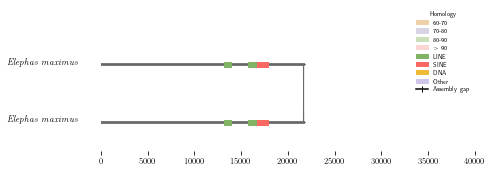

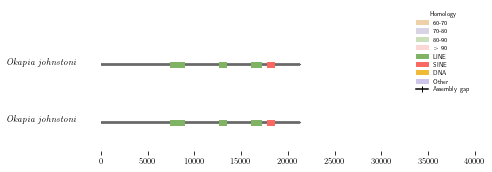

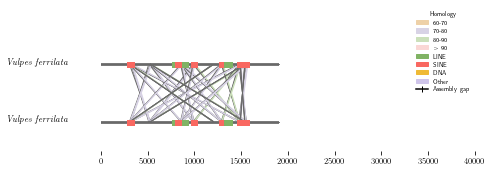

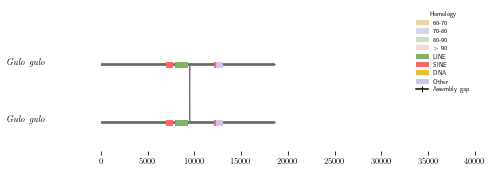

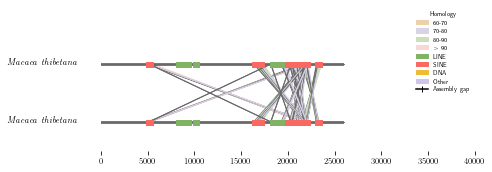

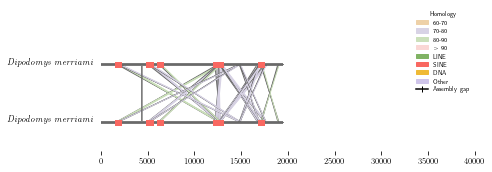

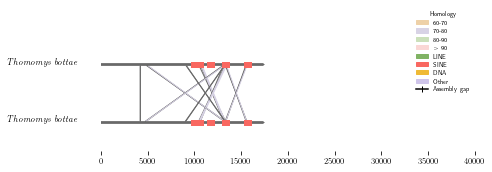

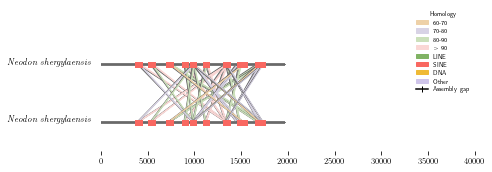

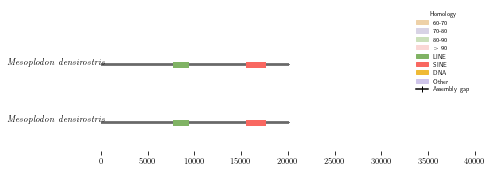

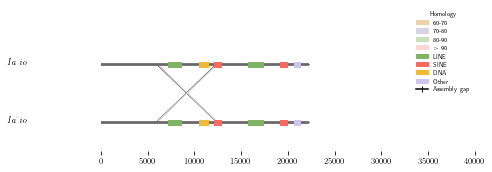

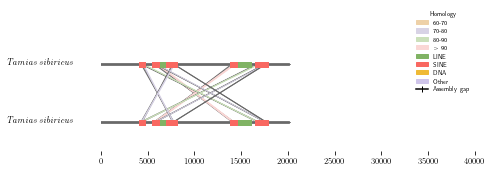

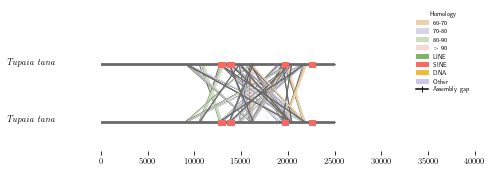

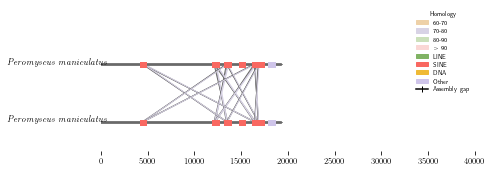

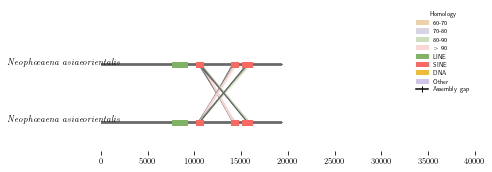

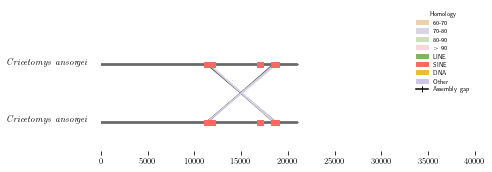

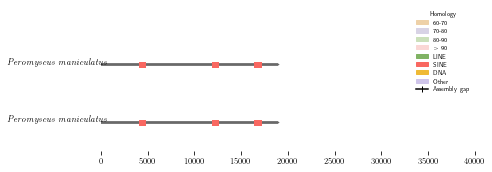

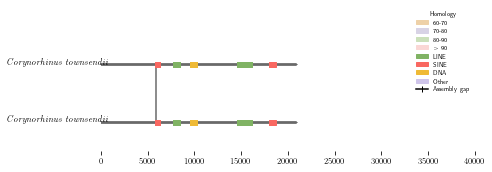

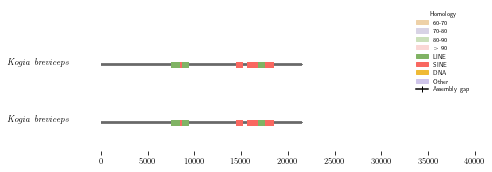

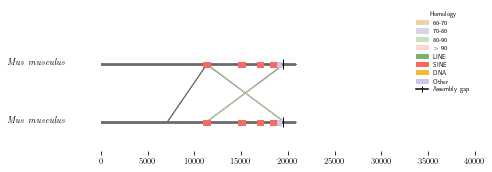

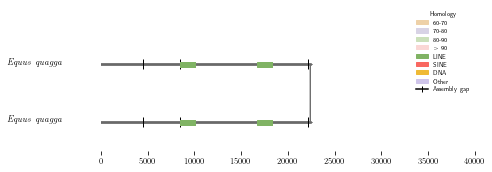

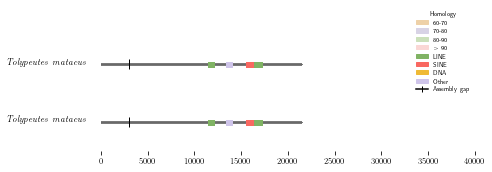

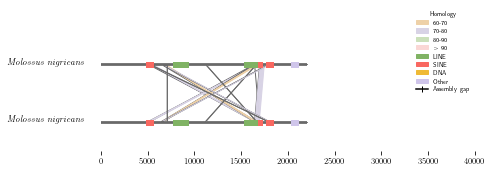

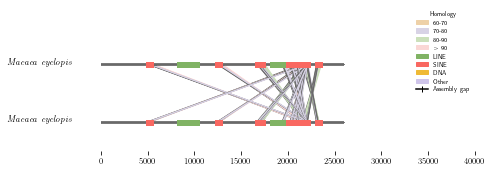

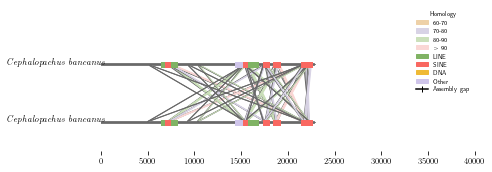

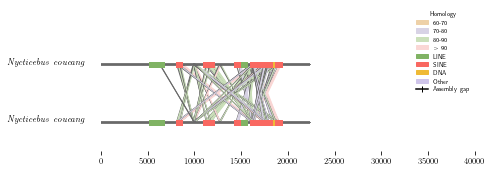

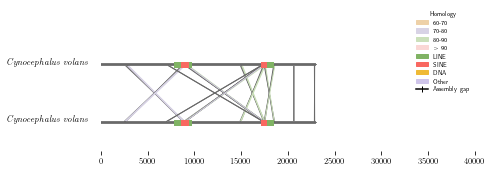

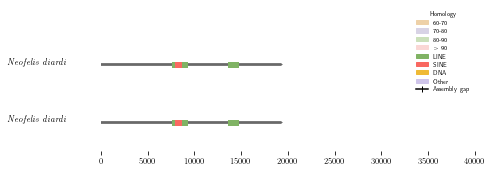

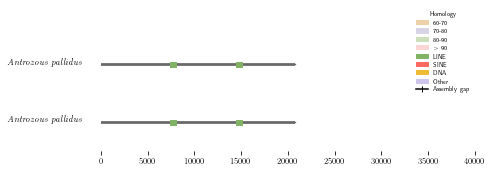

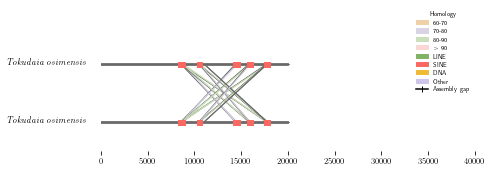

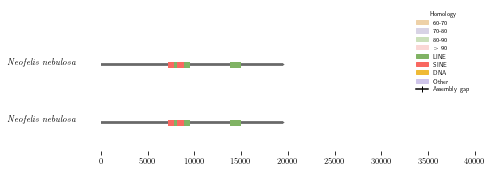

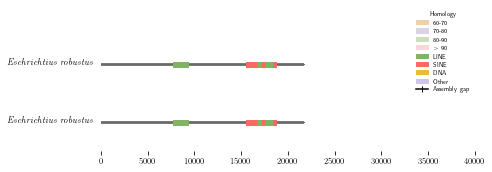

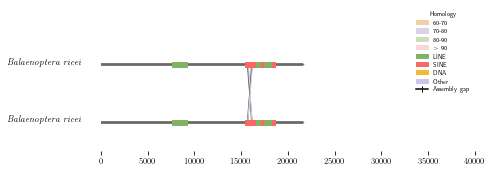

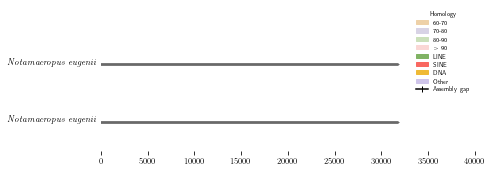

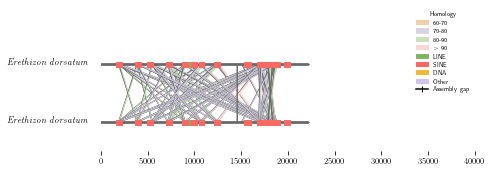

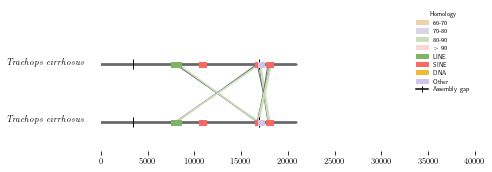

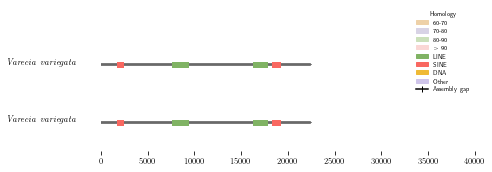

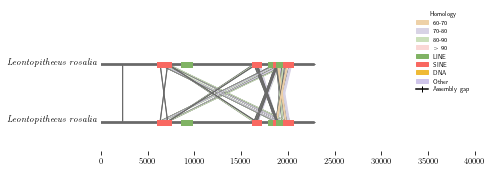

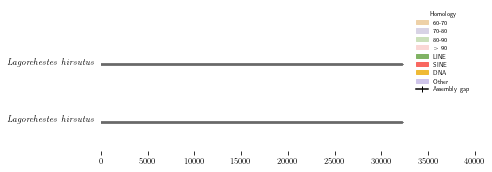

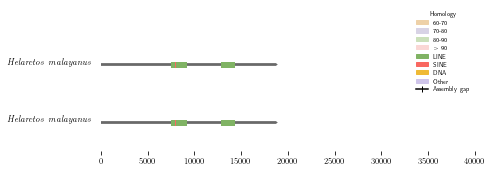

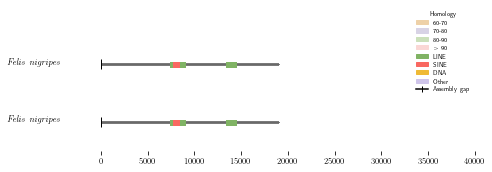

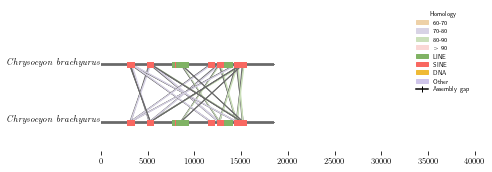

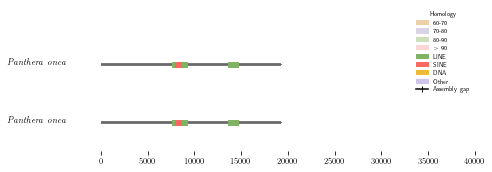

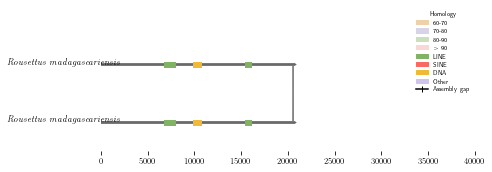

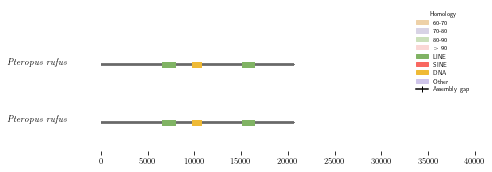

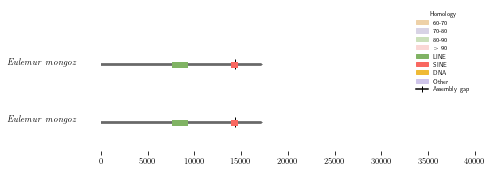

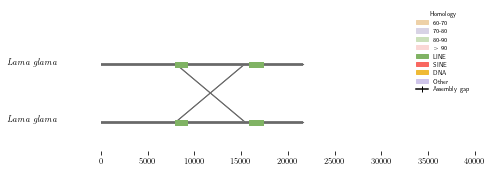

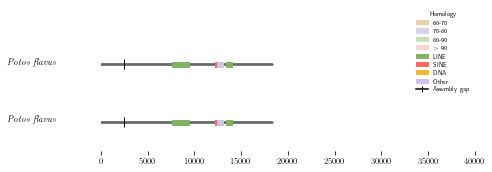

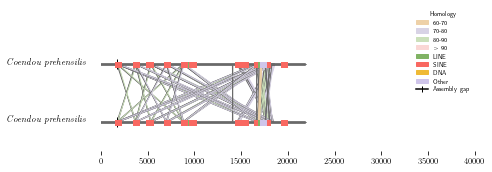

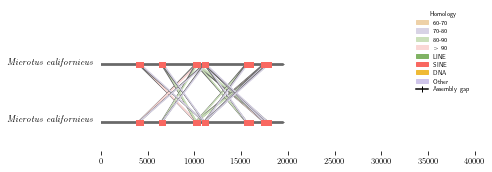

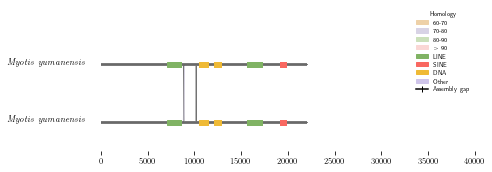

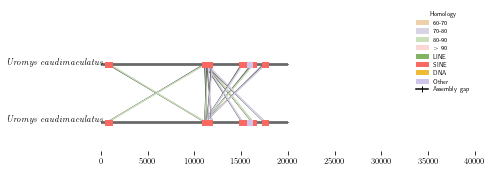

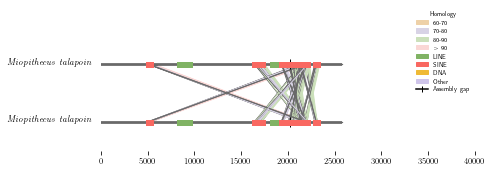

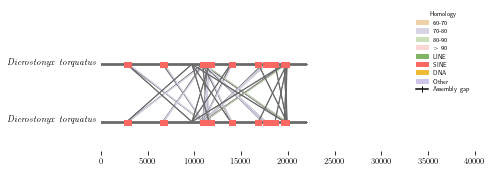

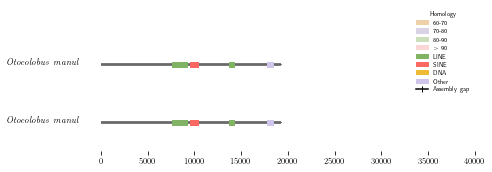

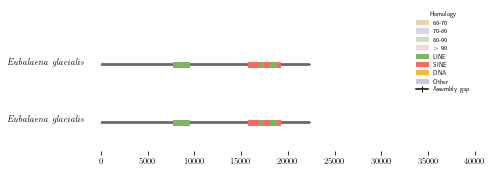

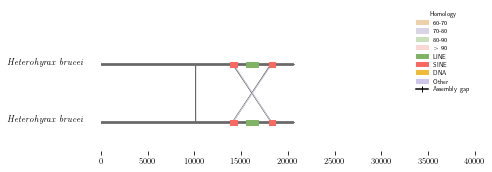

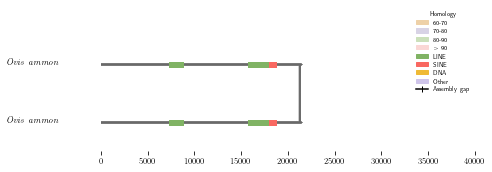

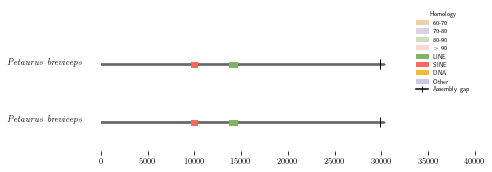

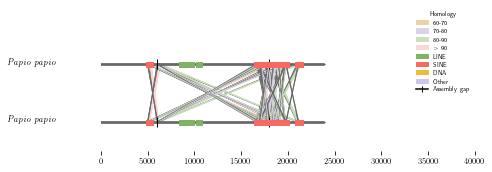

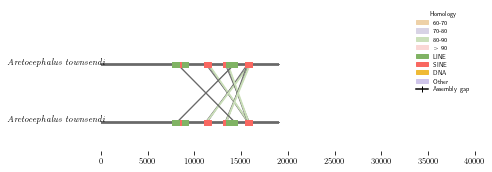

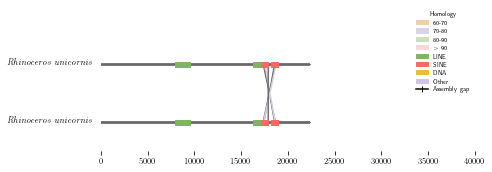

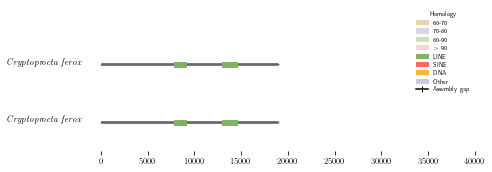

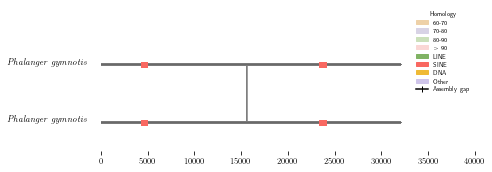

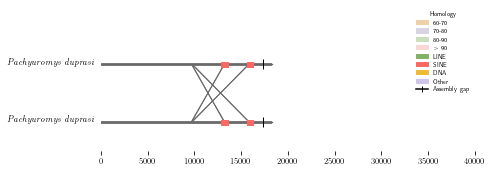

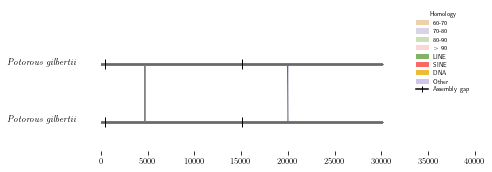

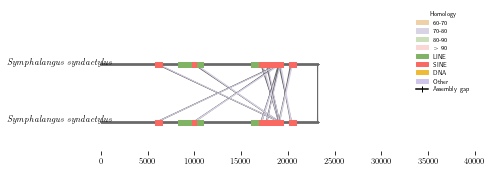

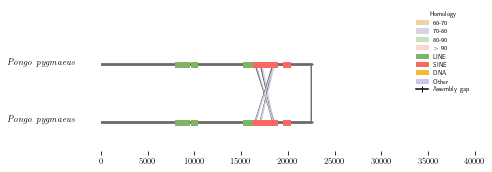

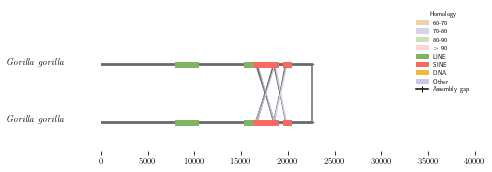

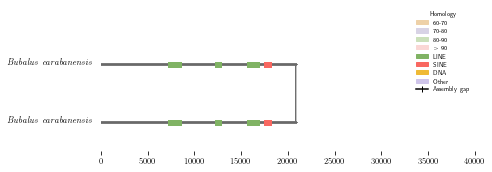

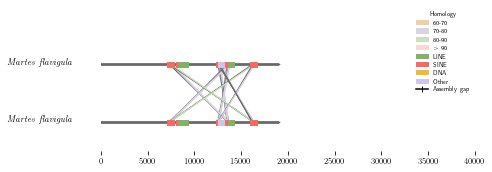

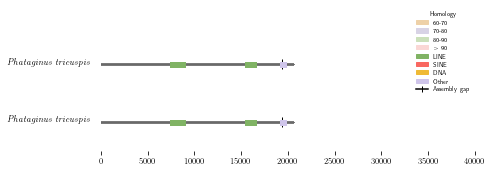

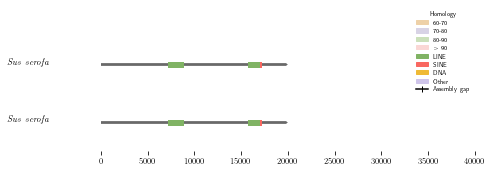

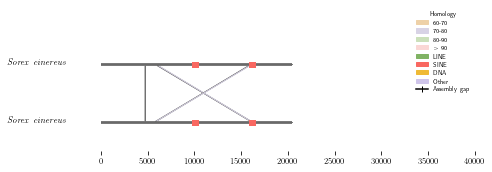

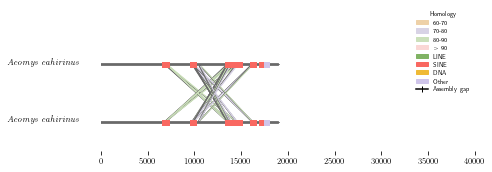

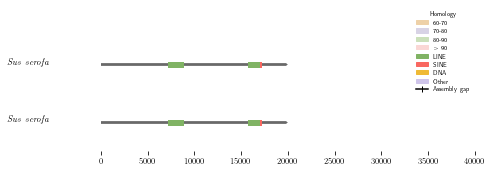

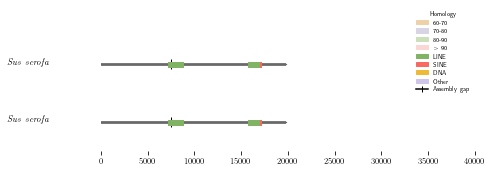

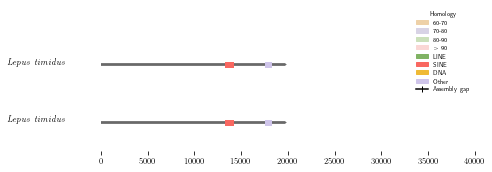

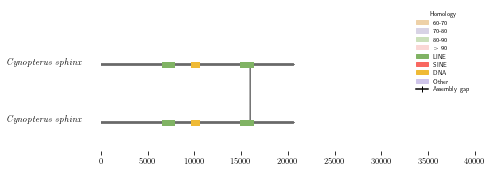

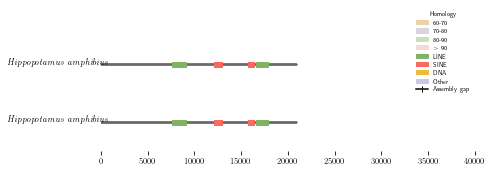

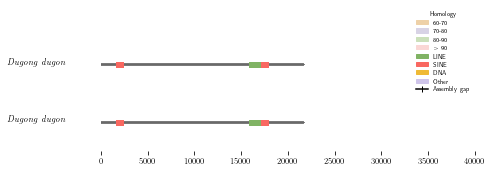

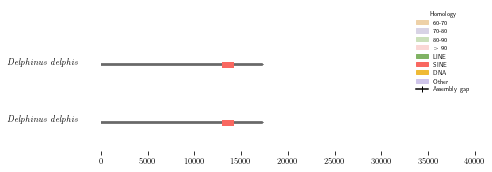

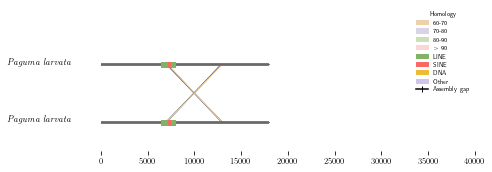

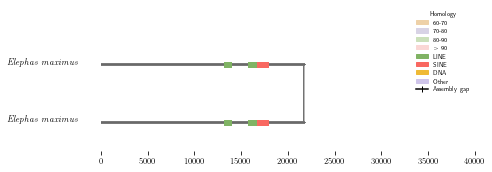

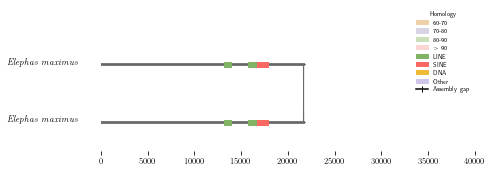

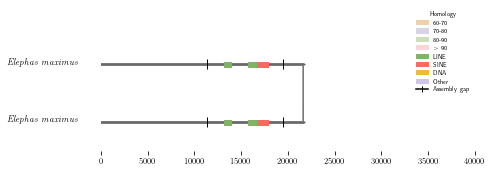

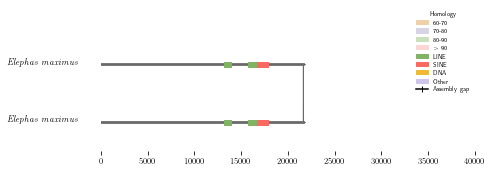

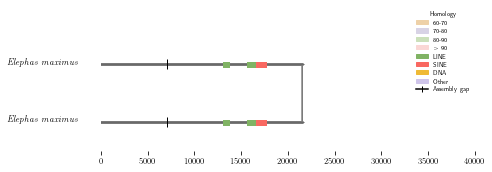

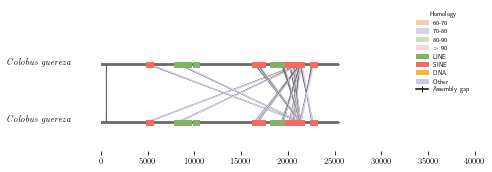

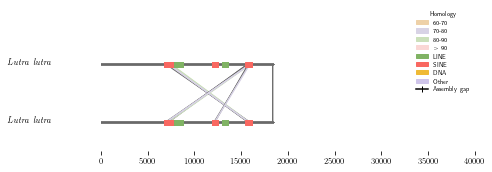

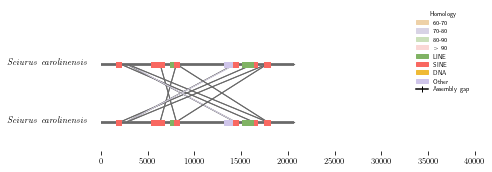

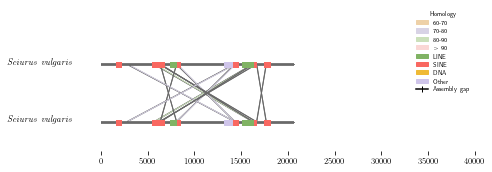

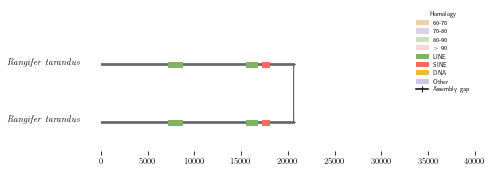

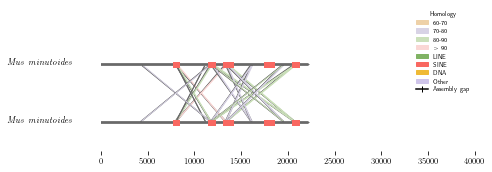

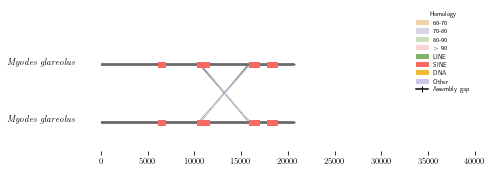

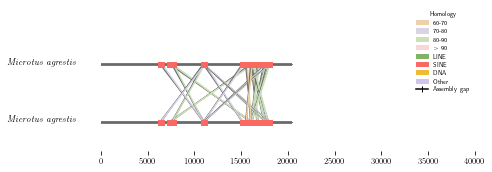

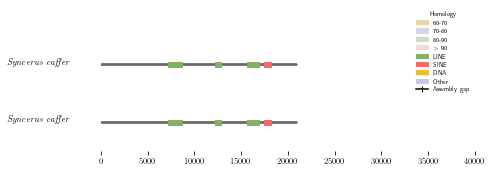

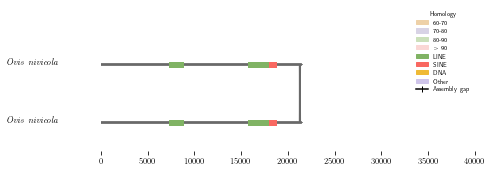

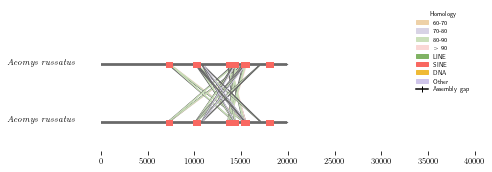

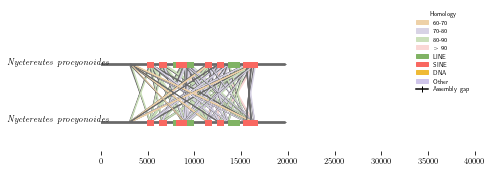

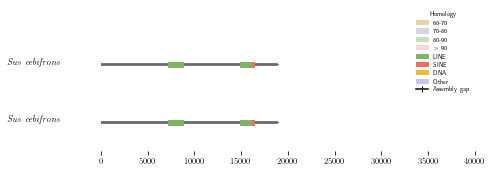

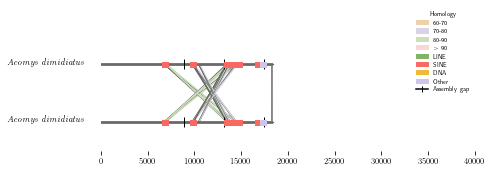

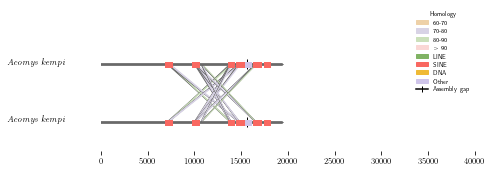

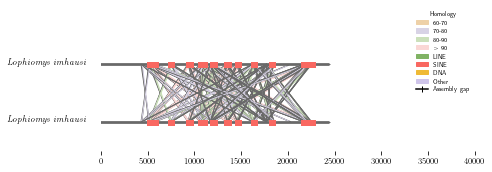

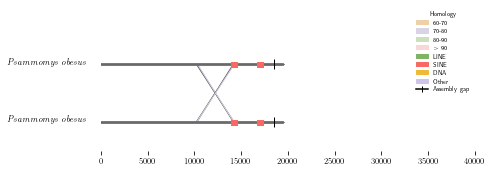

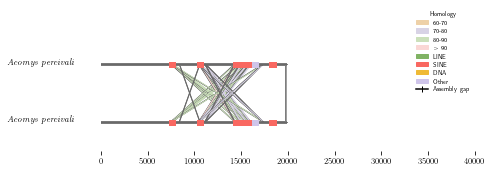

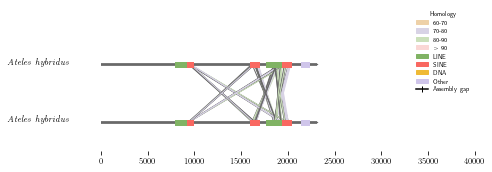

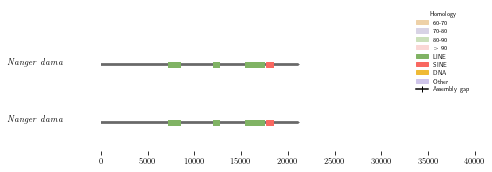

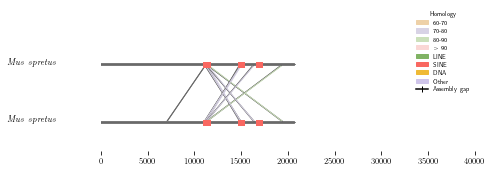

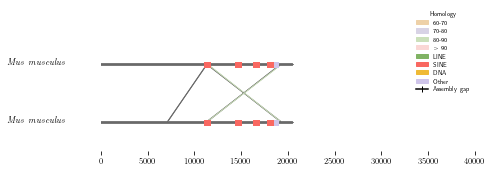

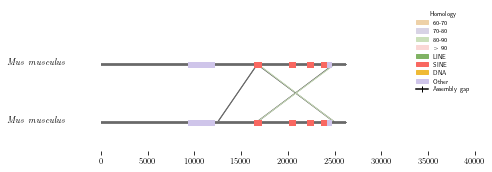

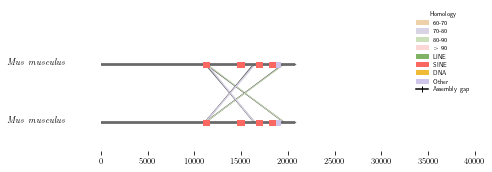

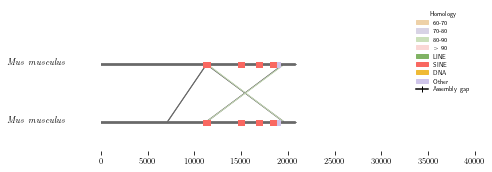

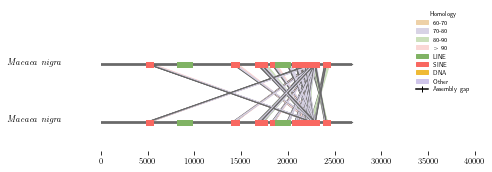

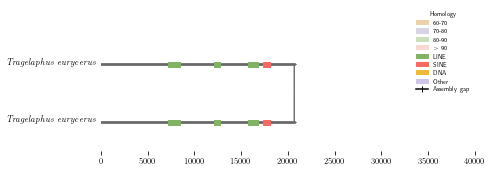

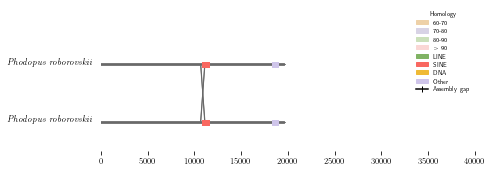

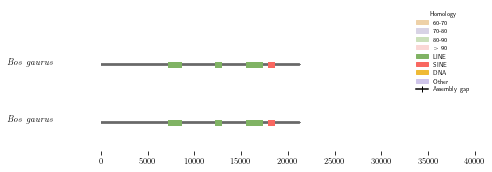

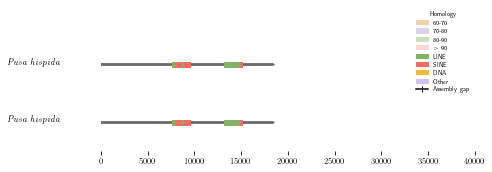

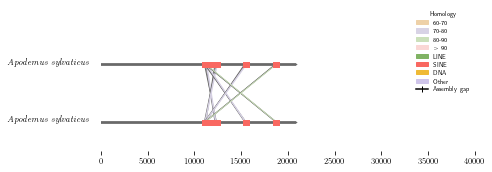

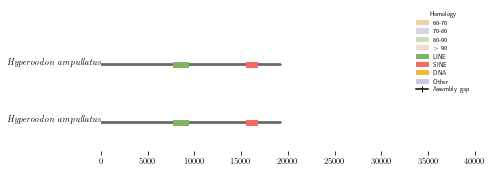

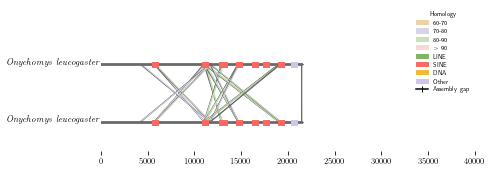

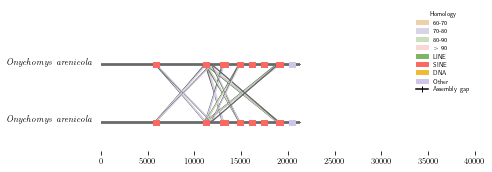

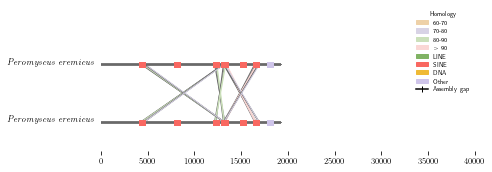

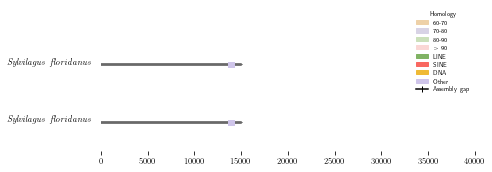

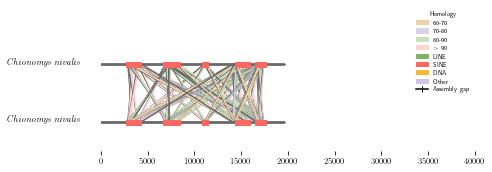

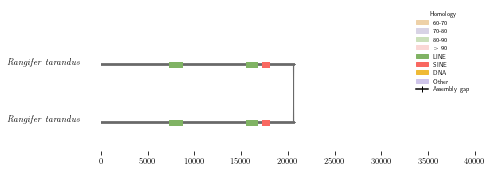

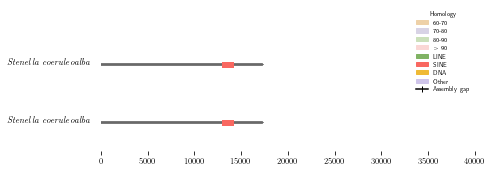

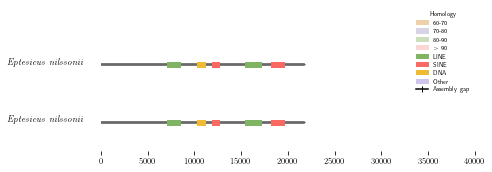

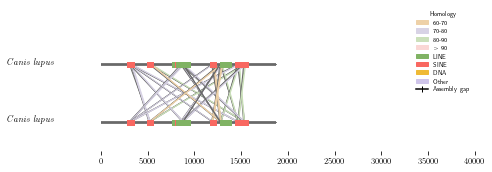

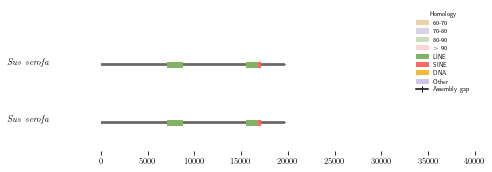

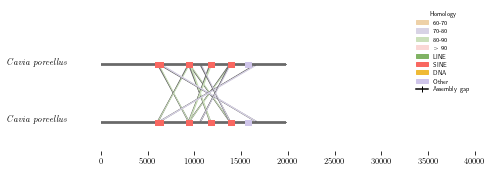

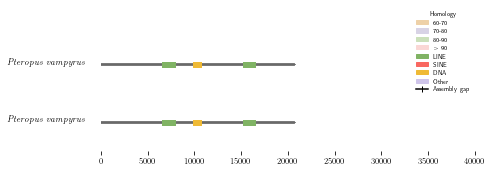

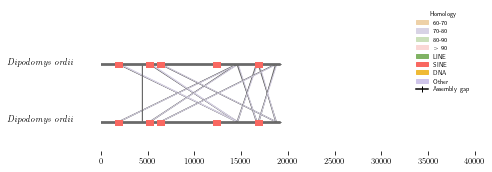

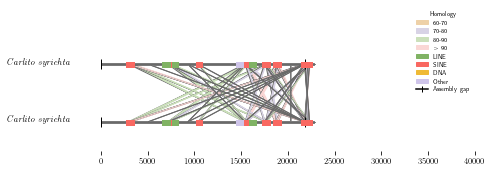

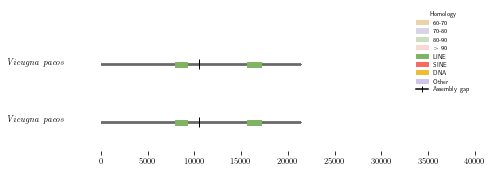

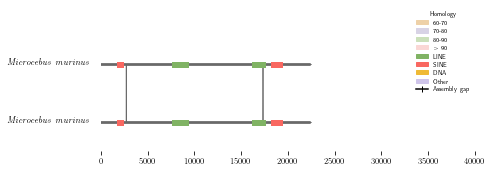

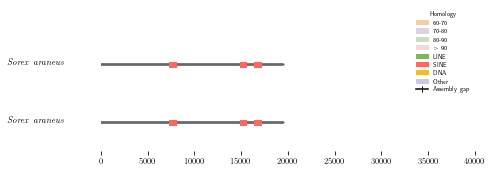

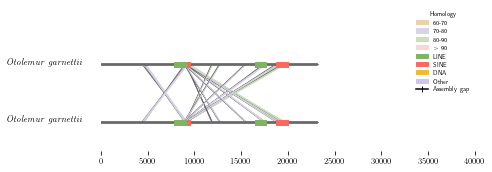

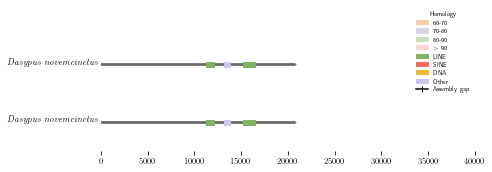

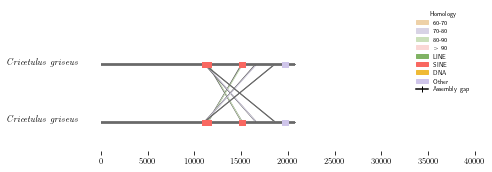

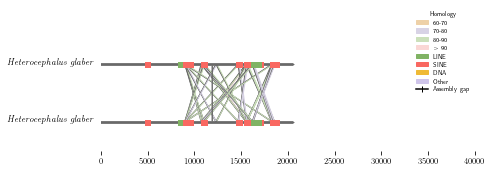

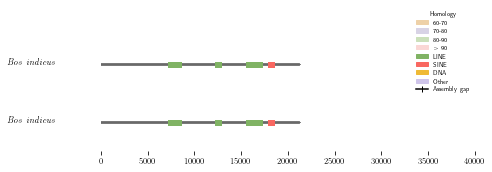

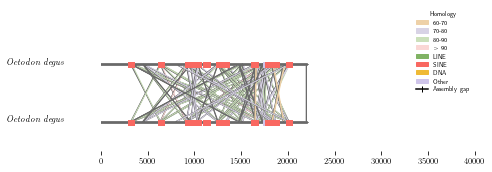

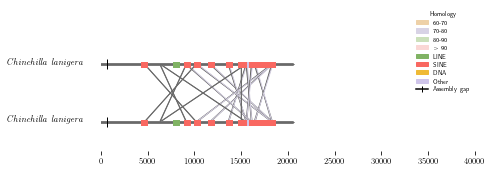

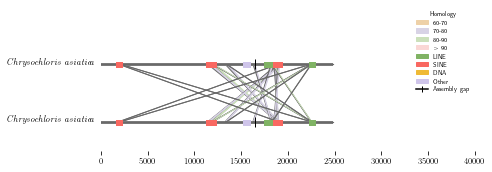

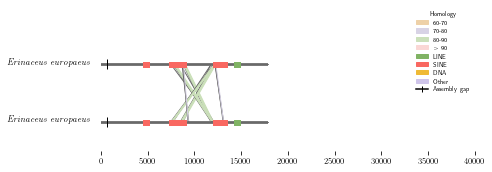

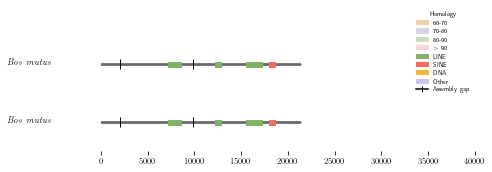

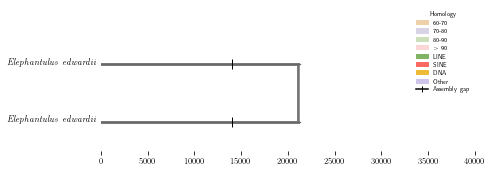

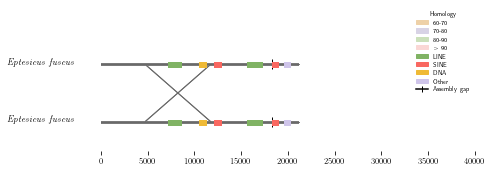

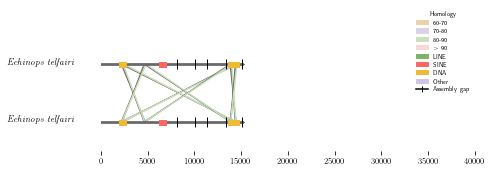

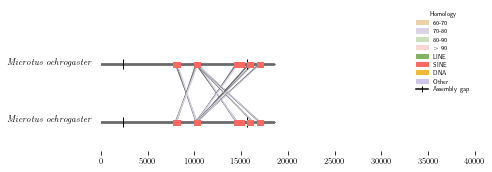

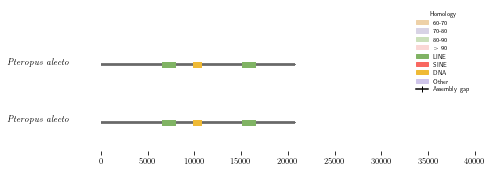

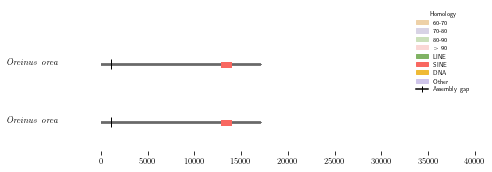

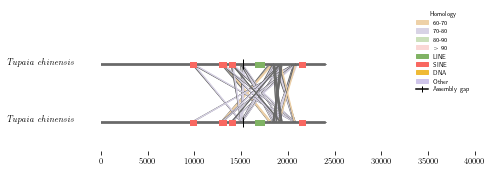

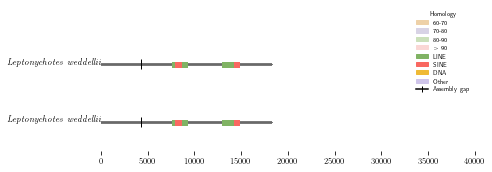

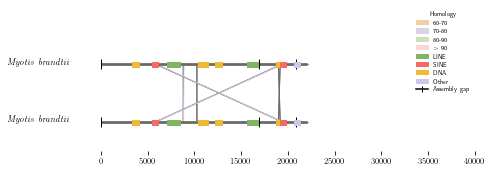

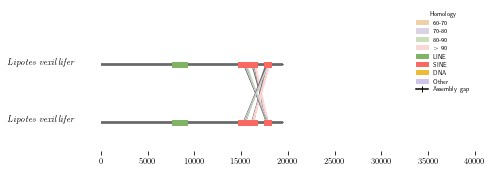

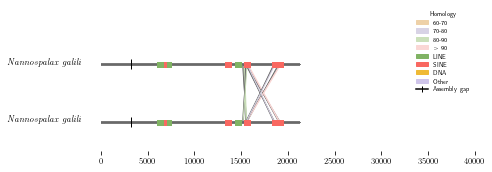

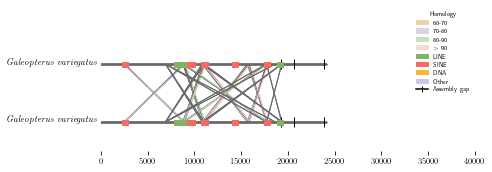

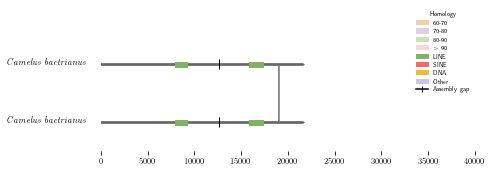

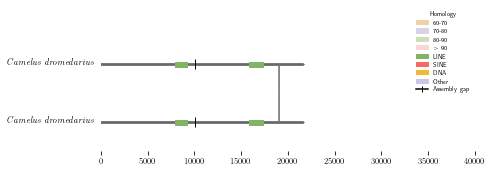

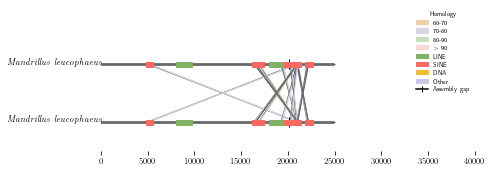

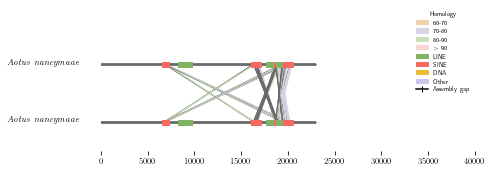

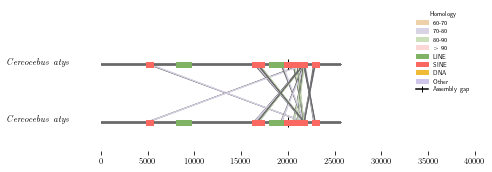

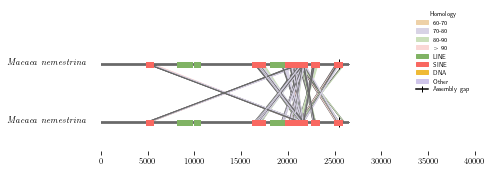

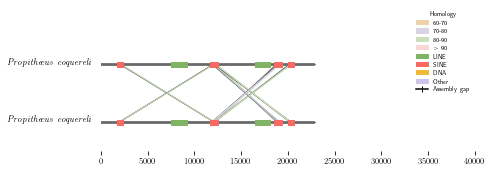

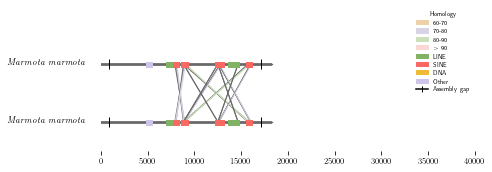

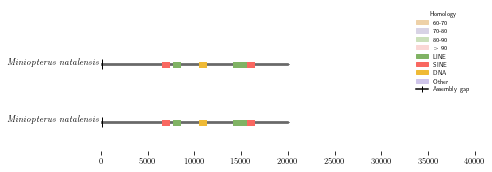

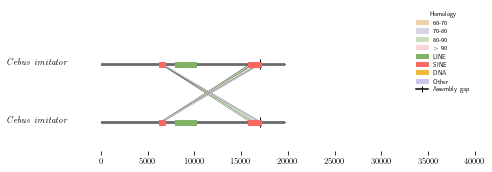

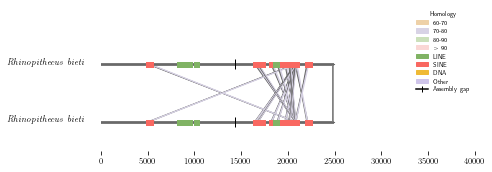

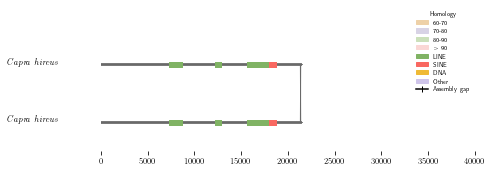

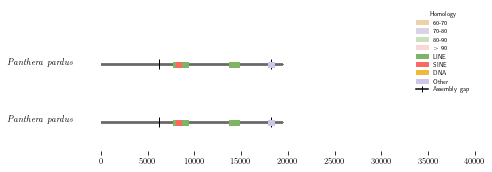

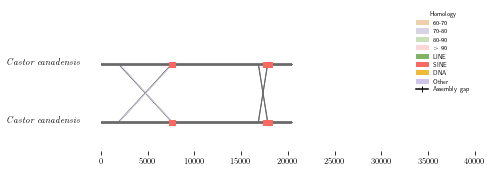

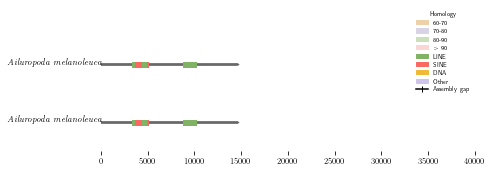

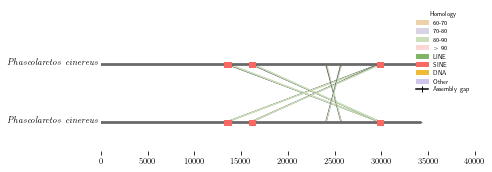

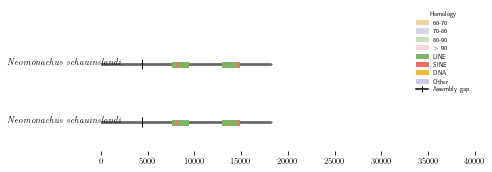

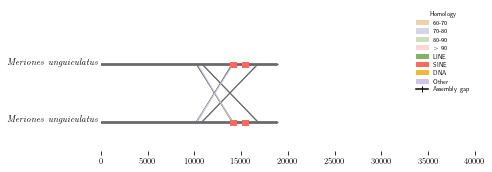

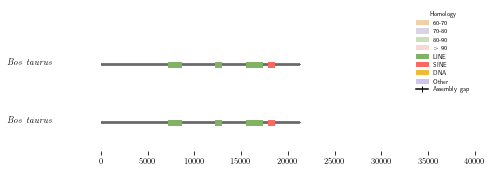

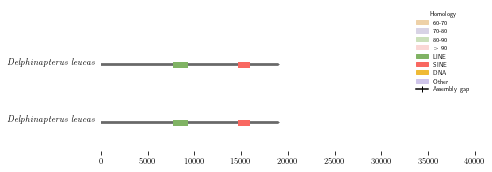

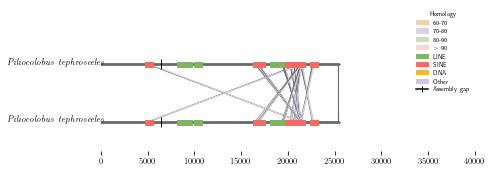

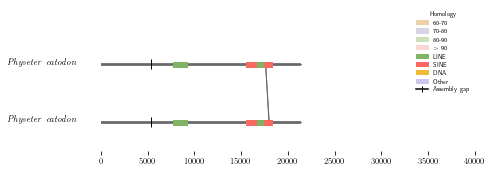

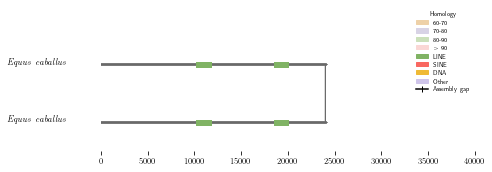

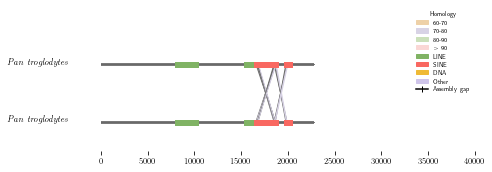

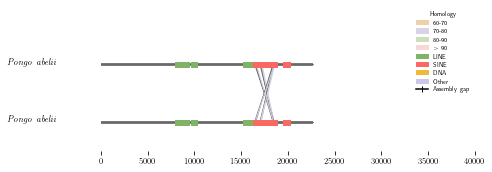

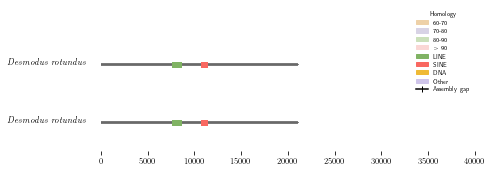

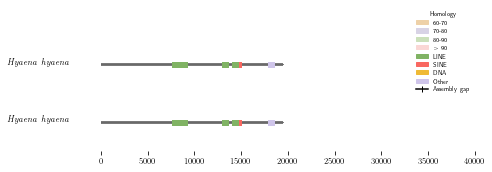

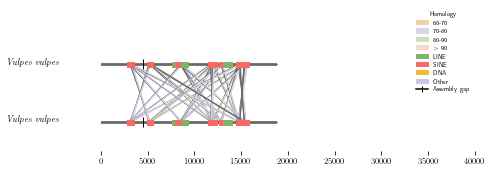

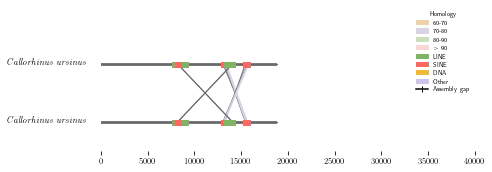

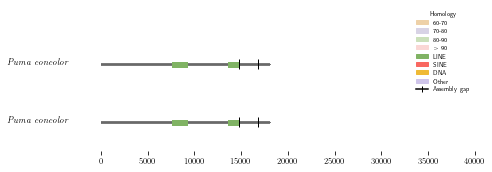

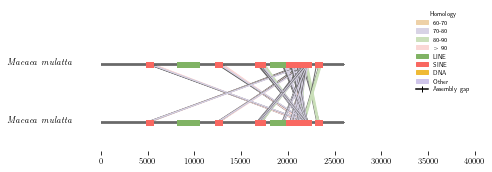

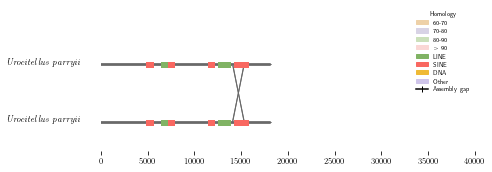

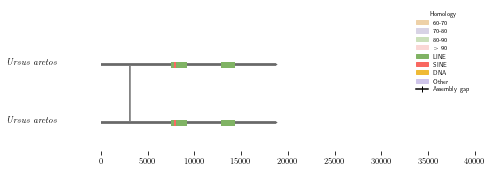

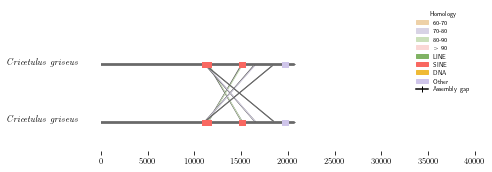

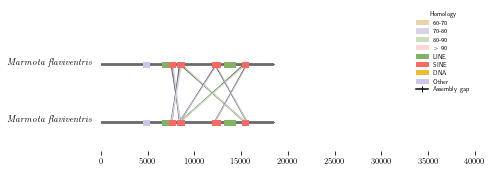

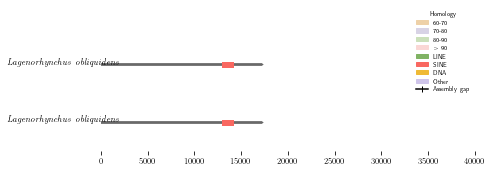

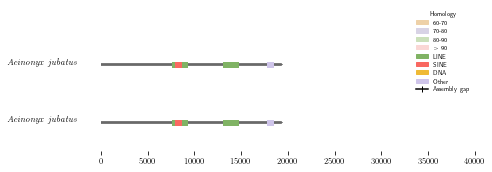

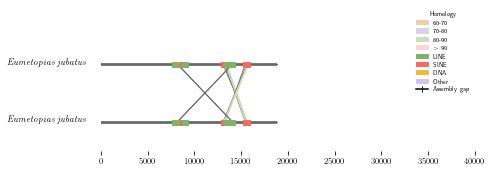

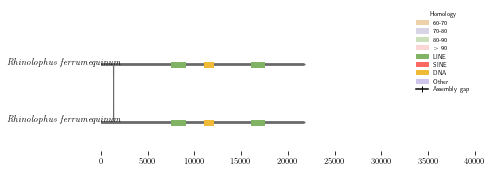

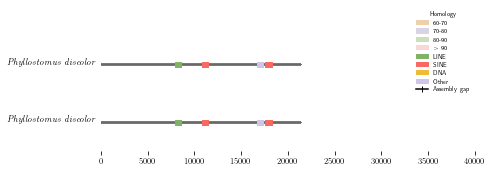

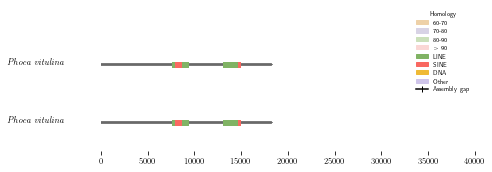

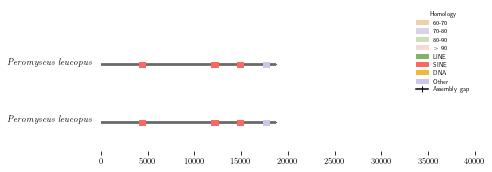

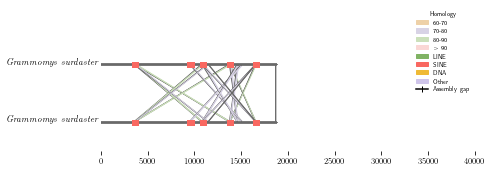

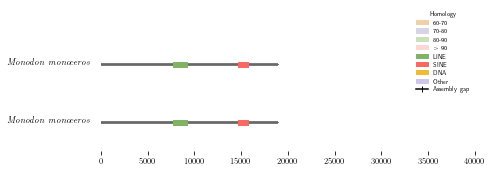

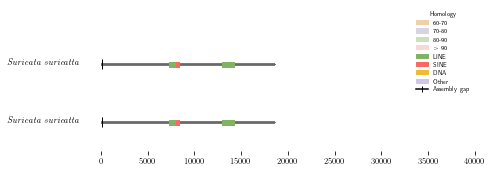

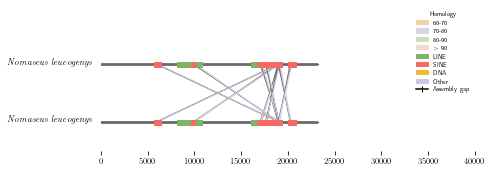

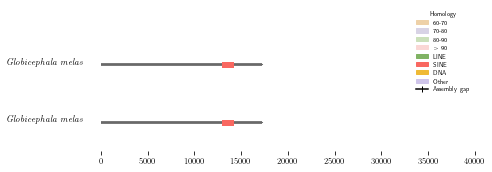

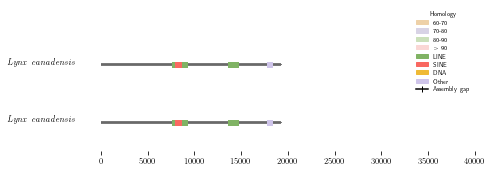

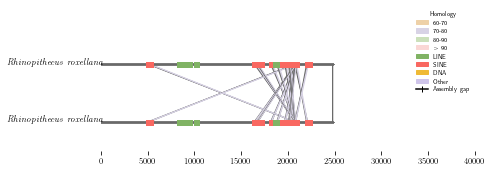

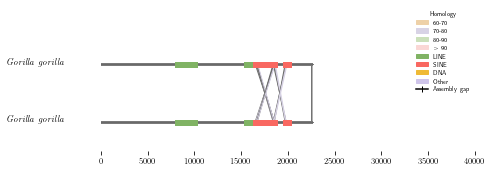

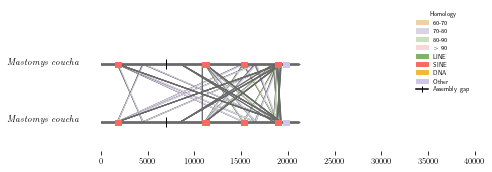

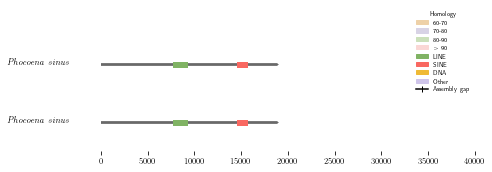

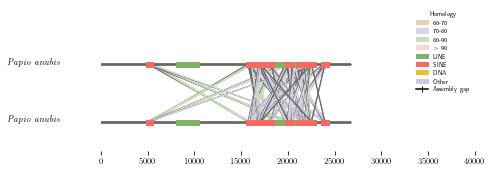

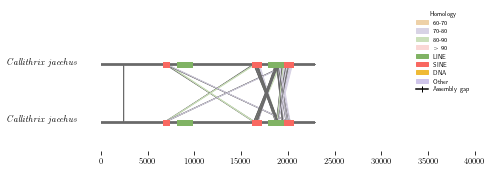

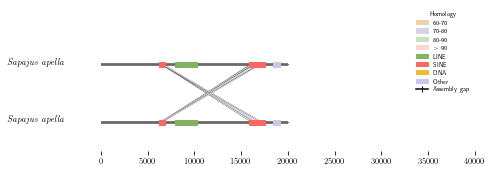

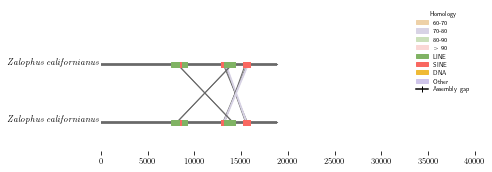

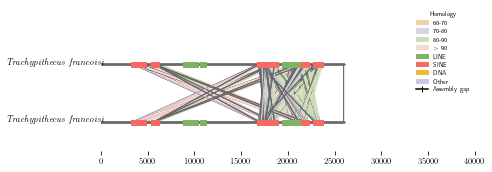

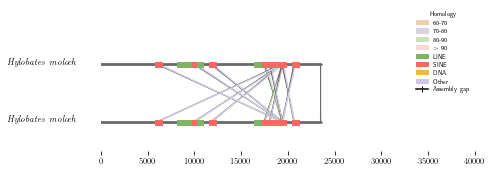

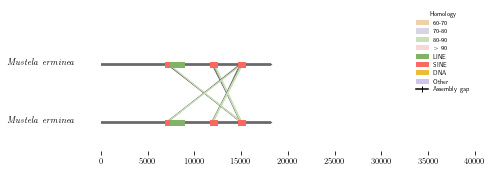

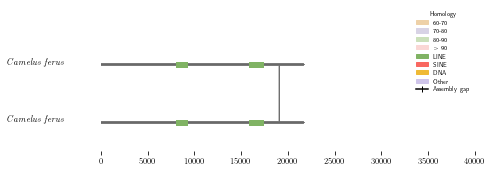

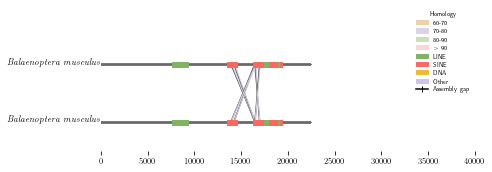

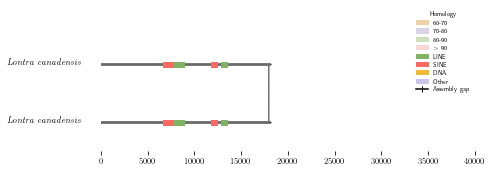

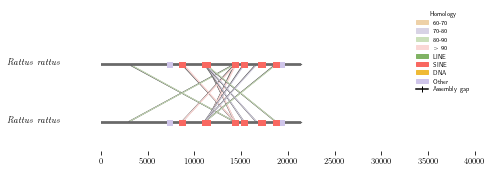

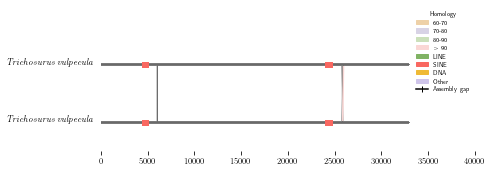

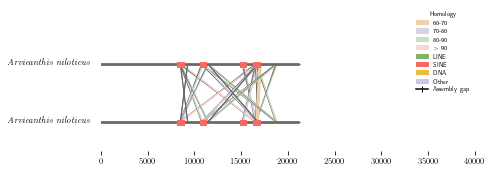

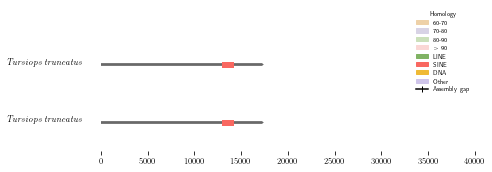

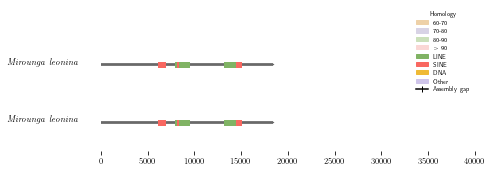

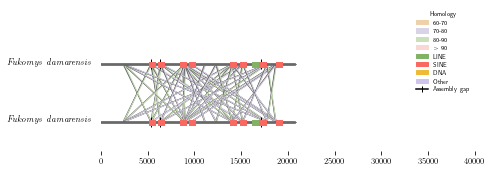

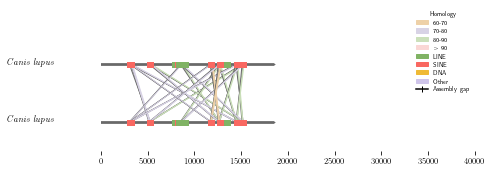

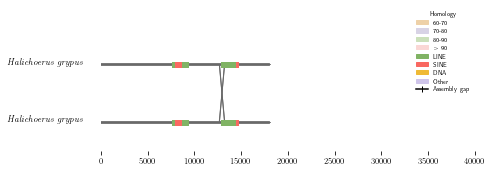

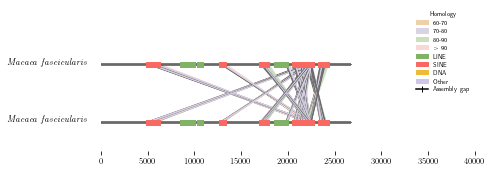

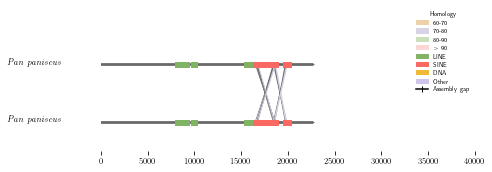

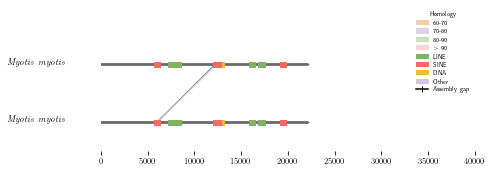

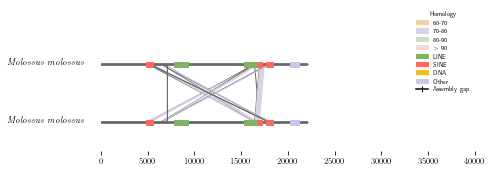

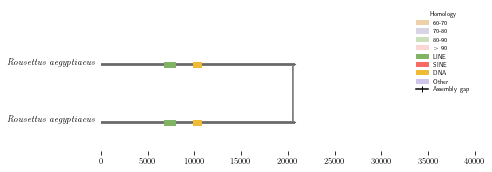

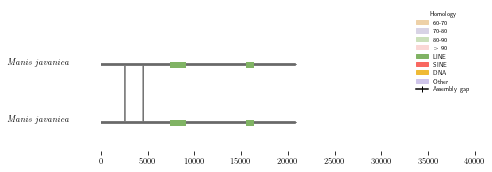

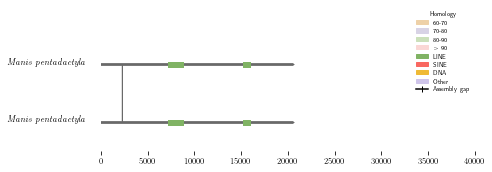

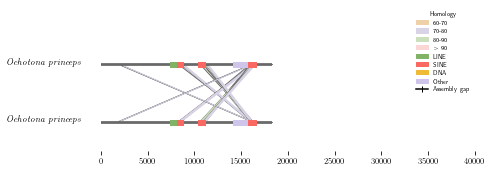

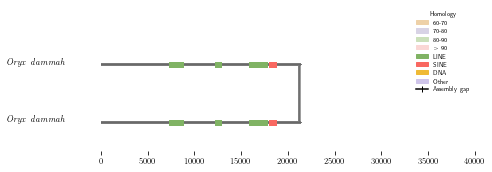

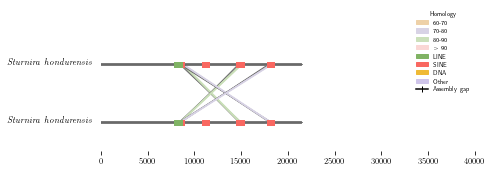

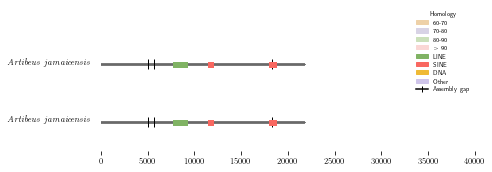

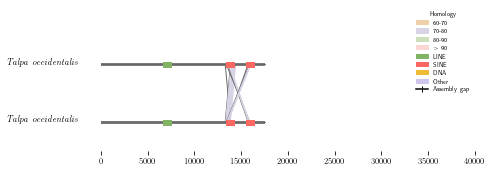

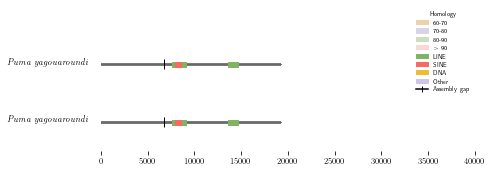

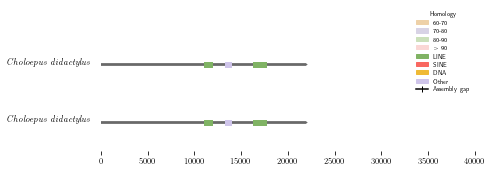

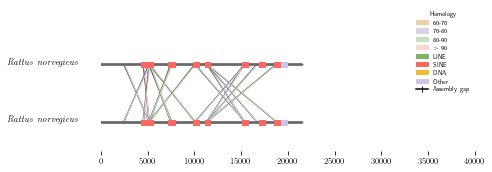

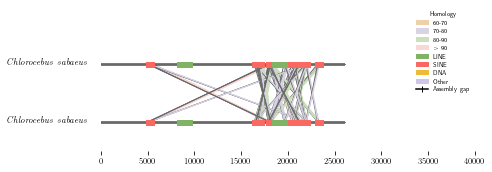

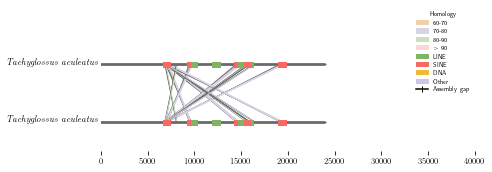

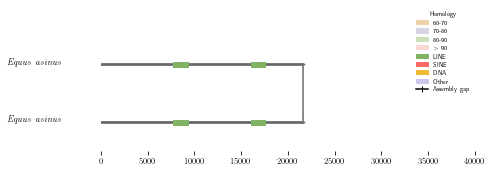

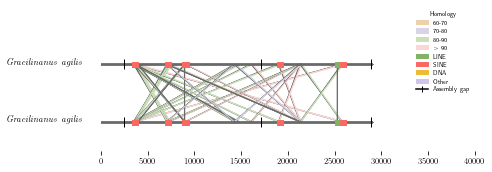

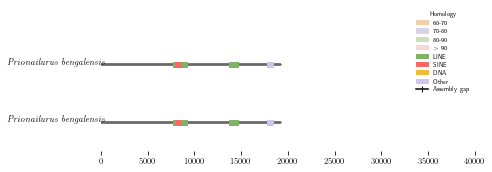

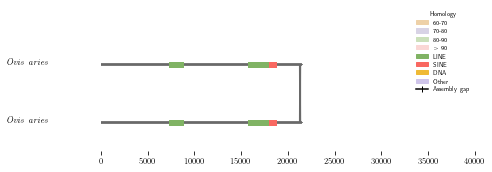

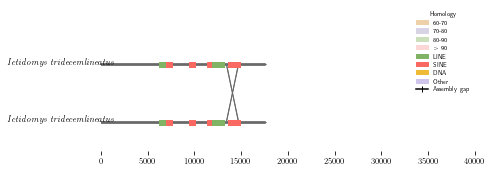

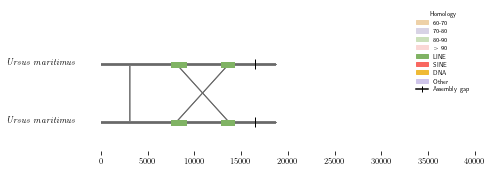

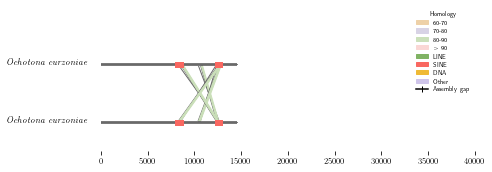

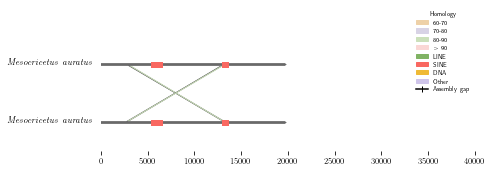

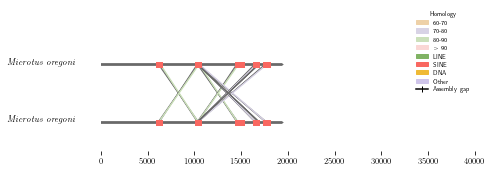

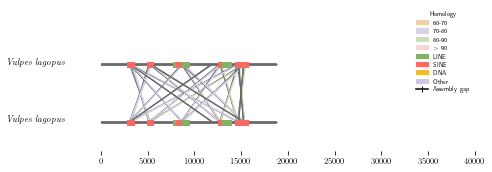

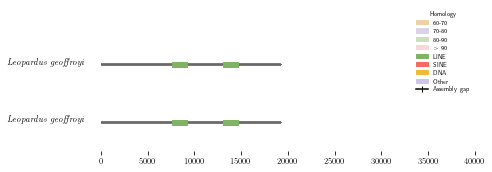

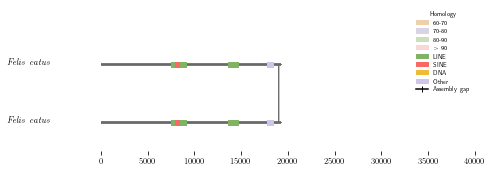

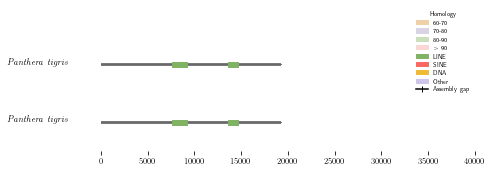

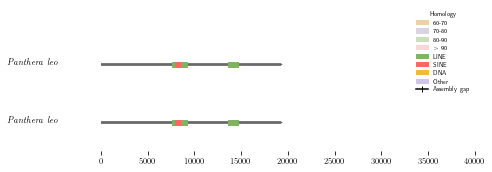

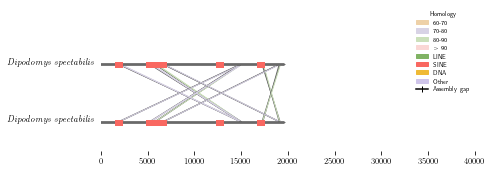

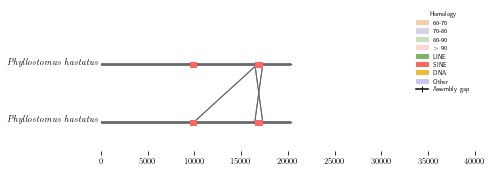

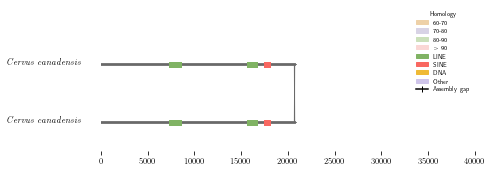

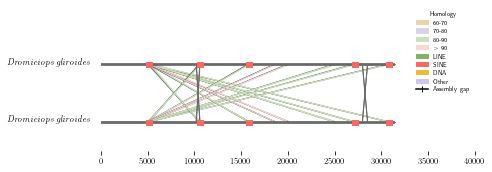

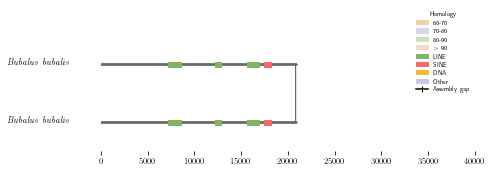

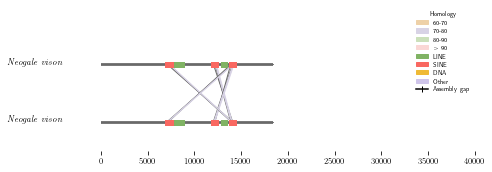

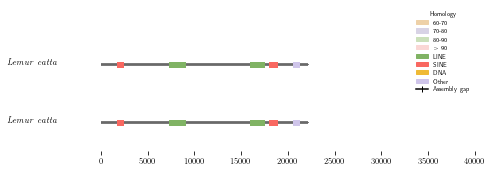

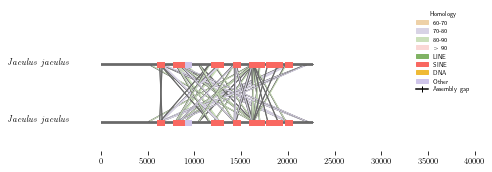

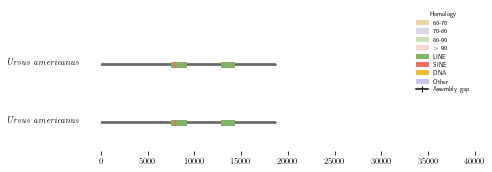

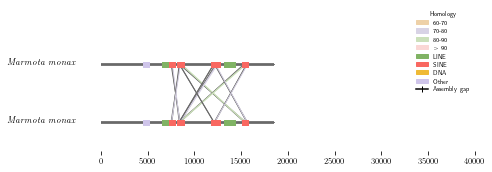

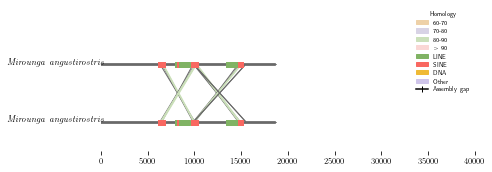

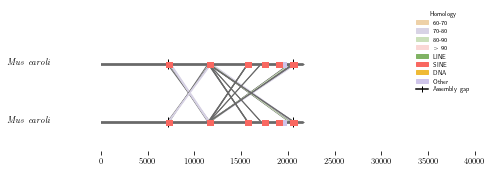

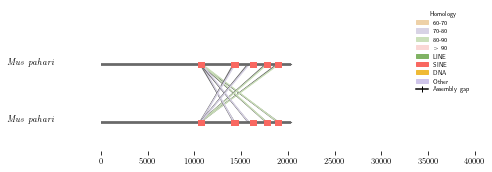

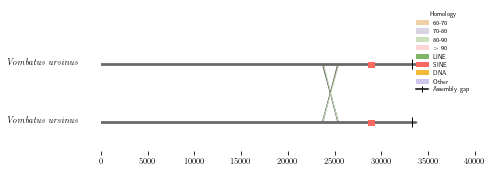

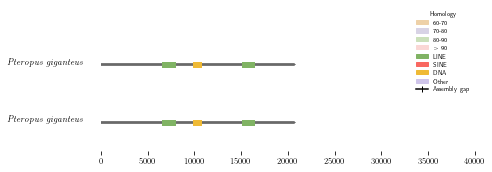

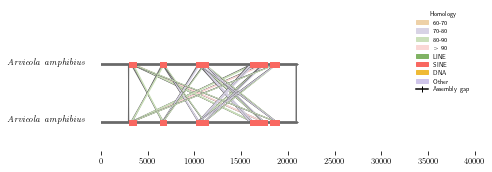

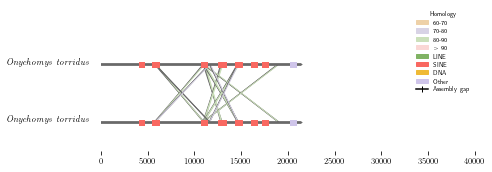

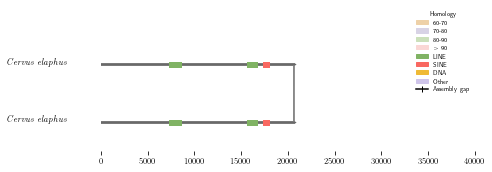

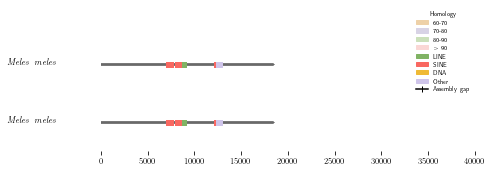

In [101]:

fontsize = 9
xlim = 40000
text_start = -10000
for genome in neat1:
    filename = genome + '_' + latin[genome].replace(' ','_')
    xstart = 0


    plt.figure(figsize=(7, 2.5))

    for idx in range(1,2):

        genome1 = genome
        genome2 = genome
        if genome1 in blastrc and genome2 in blastrc[genome1]:
            for item in blastrc[genome1][genome2]:
                start = blastrc[genome1][genome2][item][0]
                end = blastrc[genome1][genome2][item][1]
                plt.plot(start,[idx,idx + 1],'dimgray',linewidth=1)
                plt.plot(end,[idx,idx + 1],'dimgray',linewidth=1)
                k = start[0] + 50
                m = start[1] + 50
                color = colors[blastrc[genome1][genome2][item][2]]
                while k < end[0] or m < end[1]:
                    plt.plot([k,m],[idx,idx + 1],color,linewidth=1)
                    k += 50
                    m += 50
        plt.plot([idx for i in range(length[genome1])],'s',color='dimgray',markersize=0.2)


        if genome1 in gaps:
            g = [idx if i in gaps[genome1] else 0 for i in range(length[genome1])]
            plt.plot(g, '|',markersize=10,color='black')

        if genome1 in TE:
            for element in TE[genome1]:
                if 'DNA' in element:
                    color=colormap['DNA']
                elif 'SINE' in element:
                    color=colormap['SINE']
                elif 'LINE' in element:
                    color = colormap['LINE']
                else:
                    color=colormap['Other']
                a = [idx if i in range(TE[genome1][element][1],TE[genome1][element][2]) else 0 for i in range(length[genome1])]
                plt.plot(a, 's',markersize=5,color=color)

        genname1 = '\ '.join(latin[genome1].split(' ')[:2])
        genname2 = '\ '.join(latin[genome2].split(' ')[:2])
        plt.text(text_start, idx, r"$\mathit{" + genname1 + "}$",fontsize=fontsize, fontstyle='italic')
        plt.text(text_start, idx+1, r"$\mathit{" + genname2 + "}$",fontsize=fontsize, fontstyle='italic')


        idx += 1
    plt.plot([idx for i in range(length[genome2])],'s',color='dimgray',markersize=0.2)

    if genome2 in gaps:
        g = [idx if i in gaps[genome2] else 0 for i in range(length[genome2])]
        plt.plot(g, '|',markersize=10,color='black')
    if genome2 in TE:
        for element in TE[genome2]:
            if 'DNA' in element:
                color=colormap['DNA']
            elif 'SINE' in element:
                color=colormap['SINE']
            elif 'LINE' in element:
                color = colormap['LINE']
            else:
                color=colormap['Other']
            a = [idx if i in range(TE[genome2][element][1],TE[genome2][element][2]) else 0 for i in range(length[genome2])]
            plt.plot(a, 's',markersize=5,color=color)


    plt.xlim([0,xlim])
    plt.ylim([0.5,3])
    plt.yticks([])
    plt.xticks(fontsize=8)
    patch_70 = mpatches.Patch(color=colormap['70'], label='60-70')
    patch_80 = mpatches.Patch(color=colormap['80'], label='70-80')
    patch_90 = mpatches.Patch(color=colormap['90'], label='80-90')
    patch_100 = mpatches.Patch(color=colormap['100'], label='$>$ 90')
    patch_LINE = mpatches.Patch(color=colormap['LINE'], label='LINE')
    patch_SINE = mpatches.Patch(color=colormap['SINE'], label='SINE')
    patch_DNA = mpatches.Patch(color=colormap['DNA'], label='DNA')
    #patch_Other = mpatches.Patch(color=colormap['Other2'], label='ERV')
    patch_Other = mpatches.Patch(color=colormap['Other'], label='Other')
    patch_gap = mlines.Line2D([],[],color='black',marker='|',markersize=6,label='Assembly gap')

    plt.legend(handles=[patch_70,patch_80,patch_90,patch_100,patch_LINE,patch_SINE,patch_DNA,patch_Other,
                       patch_gap], title_fontsize=6,
               fontsize = fsizeleg,title='Homology %',frameon=False)

    plt.box(False)
    plt.tight_layout()
    plt.savefig('./FiguresPublication/Self-complimentary/NEAT1_' + filename + '.png',dpi=300)